# CESM2-FV2 vs ERA5 Snow Comparison Analysis

**Author:** Austin Finnell  
**Date:** November 2025  
**Purpose:** Compare CESM2-FV2 historical run (ensemble member r1i2p2f1) with ERA5 reanalysis for snow water equivalent (SWE) and snowfall in the Western U.S.

This notebook analyzes snow patterns in the Western United States from January 1, 1994 to December 31, 2014, comparing CESM2-FV2 model output with ERA5 reanalysis data.

## Dependencies

- **xESMF**: Required for regridding ERA5 data to CESM2-FV2 grid. Uses bilinear interpolation for SWE (intensive quantity) and conservative regridding for snowfall totals (extensive quantity).
- **xhistogram**: Optional - used for robust elevation-stratified analysis. Falls back to basic methods if unavailable.

## Analysis Overview

- **Spatial Comparisons**: Side-by-side maps of CESM2-FV2 and ERA5 for SWE and snowfall
- **Difference Maps**: CESM2-FV2 - ERA5 differences to identify model biases
- **Elevation Analysis**: Comparison of CESM2-FV2 and ERA5 elevation data with quantitative correlation analysis
- **Elevation-Stratified Analysis**: Bias and RMSE analysis by elevation bins
- **Variable-Elevation Correlation**: Side-by-side comparison of variable differences with elevation differences
- **Rocky Mountain Focus**: Regional analysis of elevation-snowfall relationships

## Data Sources

- **CESM2-FV2**: CMIP6 historical run, ensemble member r1i2p2f1
  - Variable `snw`: Snow Water Equivalent (kg m⁻²)
  - Variable `prsn`: Snowfall Rate (kg m⁻² s⁻¹)
  - Grid: Finite Volume (FV) grid with variable resolution (~1.89°×2.50°)
  - Time coverage: 1850-2014 (complete coverage for analysis period 1994-2014)
  
- **ERA5**: ECMWF reanalysis
  - Variable `sd`: Snow Depth Water Equivalent (kg m⁻²)
  - Variable `sf`: Snowfall Accumulation (kg m⁻²)
  - Grid: Regular latitude-longitude grid at 0.25°×0.25° resolution

## Units and Conversions

### SWE (Snow Water Equivalent)
- **CESM2-FV2**: `snw` in kg m⁻² (no conversion needed)
- **ERA5**: `SD` in meters → × 1000 → kg m⁻²

### Snowfall
- **CESM2-FV2**: `prsn` in kg m⁻² s⁻¹ → × (days_in_month × 86400) → kg m⁻² monthly total
- **ERA5**: `sf` in meters/day → × 1000 × days_in_month → kg m⁻² monthly total

All final fields are monthly totals or means in **kg m⁻²** for consistent comparison.
- Both products are aligned to monthly averages for the period 1994–2014 over the Western United States

## Version 4 Improvements:
- Comprehensive educational documentation on regridding methods
- Fixed regridding: conservative method for snowfall (extensive), bilinear for SWE (intensive)
- Elevation-stratified bias and RMSE analysis
- Correlation analysis between elevation differences and snow differences
- Rocky Mountain regional analysis
- Use of existing plotting functions for elevation analysis
- Enhanced validation and documentation
- Data validation checks for time period coverage and NaN values
- Model experiment terrain integration

## Data Quality Notes:
- **NaN Values**: Some datasets may contain NaN values (typically 10-20% in SWE data), primarily in ocean/coastal regions or areas with no snow cover. These are automatically handled in analyses but may affect some statistical calculations.
- **Time Period Coverage**: All datasets are validated to ensure they cover the analysis period (1994-2014). The data validation cell provides detailed coverage information.


## Understanding Regridding Methods: A Beginner's Guide

When comparing climate data from different sources (like CESM2 and ERA5), the data are often on different grids. **Regridding** (also called interpolation or remapping) is the process of transforming data from one grid to another. The choice of regridding method is **critical** and depends on what type of variable you're working with.

### Intensive vs Extensive Quantities

The key concept is understanding whether your variable is **intensive** or **extensive**:

#### **Intensive Quantities** (Point Values)
- **Definition**: Properties that have a value at each point in space, independent of the size of the region
- **Examples**: 
  - Temperature (°C) - the temperature at a point doesn't depend on area
  - Snow Water Equivalent (SWE in kg m⁻²) - the amount of water per unit area
  - Pressure (Pa) - pressure at a point
  - Elevation (m) - height above sea level at a point
- **Key Property**: If you double the area, the value stays the same (it's a density or rate per unit area)

**Analogy**: Think of temperature. If it's 20°C at a point, it's still 20°C whether you're looking at a 1 km² or 10 km² area around that point.

#### **Extensive Quantities** (Total Amounts)
- **Definition**: Properties that represent total amounts that depend on the size of the region
- **Examples**:
  - Total snowfall (kg) - the total amount of snow that fell in a region
  - Total precipitation (kg) - total water that fell
  - Total energy (Joules) - total energy in a region
- **Key Property**: If you double the area, the total amount doubles (it's a cumulative quantity)

**Analogy**: Think of rainfall. If 100 kg of rain falls in a 1 km² area, then 200 kg would fall in a 2 km² area (assuming uniform distribution).

### Regridding Methods

#### **Bilinear Interpolation** (for Intensive Quantities)

**How it works**: 
- Takes the four nearest grid points surrounding a target location
- Calculates a weighted average based on distance
- Preserves the **point value** at each location

**When to use**: 
- ✅ Intensive quantities: SWE, temperature, pressure, elevation
- ✅ When you want to preserve the value at a specific point

**Example**: If SWE is 50 kg m⁻² at a point in ERA5, after bilinear regridding to CESM2, that point should still represent approximately 50 kg m⁻².

**Visual**: Imagine you have temperature measurements at four corners of a square. Bilinear interpolation estimates the temperature at any point inside that square by smoothly blending the four corner values.

#### **Conservative Regridding** (for Extensive Quantities)

**How it works**:
- Divides the source grid cells into pieces that overlap with target grid cells
- Calculates what fraction of each source cell contributes to each target cell
- **Preserves the total amount** (mass/energy conservation)
- Normalizes by target cell area to get the value per unit area

**When to use**:
- ✅ Extensive quantities: snowfall totals, precipitation totals, energy fluxes
- ✅ When you need to conserve total mass or energy
- ✅ When comparing totals across different grid resolutions

**Example**: If 1000 kg of snow falls in a high-resolution ERA5 grid cell, after conservative regridding to a coarser CESM2 grid, the total amount of snow (1000 kg) is preserved, but it's distributed across the larger CESM2 cell(s) that overlap with the original ERA5 cell.

**Visual**: Imagine you have a bucket of water (snowfall) that you need to pour into larger buckets. Conservative regridding ensures all the water from the small bucket ends up in the larger buckets - nothing is lost or created.

### Why This Matters for Our Analysis

In this notebook:
- **SWE** (Snow Water Equivalent): Intensive quantity → Uses **bilinear interpolation**
  - SWE is already a density (kg m⁻²), so we want to preserve the point value
  
- **Snowfall**: Extensive quantity → Uses **conservative regridding**
  - Snowfall represents total accumulation, so we must conserve the total amount
  - If we used bilinear interpolation, we could lose or gain snow mass, leading to incorrect comparisons

### Common Mistakes to Avoid

1. **Using bilinear for extensive quantities**: This can cause mass loss/gain, especially when regridding from high-resolution (ERA5: 0.25°) to coarse-resolution (CESM2: ~1°) grids.

2. **Using conservative for intensive quantities**: This can introduce artificial smoothing and doesn't preserve point values correctly.

3. **Not checking mass conservation**: Always validate that extensive quantities maintain similar domain totals after regridding.

### Decision Tree

```
Is your variable a total amount or accumulation?
├─ YES (extensive) → Use conservative regridding
│   Examples: snowfall, precipitation, energy fluxes
│
└─ NO (intensive) → Use bilinear interpolation
    Examples: SWE, temperature, pressure, elevation
```

### Technical Note: Conservative Normed vs Conservative

- **`conservative`**: Preserves total amount, but may not normalize by target cell area
- **`conservative_normed`**: Preserves total amount AND normalizes by target cell area (recommended for most cases)

We use `conservative_normed` in this notebook to ensure the regridded snowfall values are properly normalized per unit area.


## Setup and Imports


In [ ]:
# Core libraries
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings('ignore')

# Regridding (optional)
try:
    import xesmf as xe
    XESMF_AVAILABLE = True
except ImportError:
    XESMF_AVAILABLE = False
    print("Warning: xesmf not available. Regridding will be skipped.")
    xe = None

# Check for xhistogram (required for robust elevation binning)
try:
    from xhistogram.xarray import histogram
    XHISTOGRAM_AVAILABLE = True
except ImportError:
    XHISTOGRAM_AVAILABLE = False
    print("Warning: xhistogram not available. Elevation binning will use fallback methods.")
    histogram = None

# Xarray options
xr.set_options(keep_attrs=True)

# Plotting style
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except (OSError, ValueError):
    try:
        plt.style.use('seaborn-darkgrid')
    except (OSError, ValueError):
        try:
            plt.style.use('seaborn-dark')
        except (OSError, ValueError):
            pass

# Publication-quality plotting settings
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300  # High resolution for publication
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['grid.linewidth'] = 0.8
plt.rcParams['lines.linewidth'] = 2.0

# ============================================================================
# CONFIGURATION
# ============================================================================

# Output directory for processed data
OUTPUT_DIR = "/glade/u/home/afinnell/ATOC4870/final_project"

# Create organized output subdirectories
PLOTS_DIR = os.path.join(OUTPUT_DIR, "plots")
DATA_DIR = os.path.join(OUTPUT_DIR, "data")
WEIGHTS_DIR = os.path.join(DATA_DIR, "weights")

# Create output directories
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(PLOTS_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(WEIGHTS_DIR, exist_ok=True)

# Time period: 1994-2014 (20 years)
START_YEAR = "1994-01-01"
END_YEAR = "2014-12-31"

# Western U.S. domain boundaries
# Western U.S. domain boundaries
WEST_BOUNDS = {
    'lat': slice(25.0, 49.5),   # Southern to northern U.S. border
    'lon': slice(-125.0, -102.0)  # California to Colorado
}

# Rocky Mountain domain boundaries (for focused analysis)
ROCKY_MOUNTAIN_BOUNDS = {
    'lat': slice(35.0, 45.0),   # Southern Colorado to northern Wyoming
    'lon': slice(-115.0, -105.0)  # Western Colorado to eastern Utah
}

# CESM2-FV2 data paths (using r1i2p2f1 ensemble member for complete data coverage 1850-2014)
CESM_SWE_DIR = "/glade/campaign/collections/cmip.mirror/CMIP6/CMIP/NCAR/CESM2-FV2/historical/r1i2p2f1/LImon/snw/gn/latest"
CESM_SNOWFALL_DIR = "/glade/campaign/collections/cmip.mirror/CMIP6/CMIP/NCAR/CESM2-FV2/historical/r1i2p2f1/Amon/prsn/gn/latest"
CESM_OROG_PATH = "/glade/campaign/collections/cmip.mirror/CMIP6/CMIP/NCAR/CESM2-FV2/historical/r1i2p2f1/fx/orog/gn/latest/orog_fx_CESM2-FV2_historical_r1i2p2f1_gn.nc"

# ERA5 data root directories
ERA5_SWE_ROOT = "/glade/campaign/collections/rda/data/d633001/e5.moda.an.sfc"
ERA5_SNOWFALL_ROOT = "/glade/campaign/collections/rda/data/d633001/e5.moda.fc.sfc.accumu"
ERA5_GEOPOTENTIAL_ROOT = "/glade/campaign/collections/rda/data/d633000/e5.oper.invariant"
ERA5_GEOPOTENTIAL_FILE = "e5.oper.invariant.128_129_z.ll025sc.1979010100_1979010100.nc"

# Model experiment topography path
MODEL_EXP_TOPO_PATH = "/glade/u/home/wdecredico/cases/elevationChangeTesting/fv_1.9x2.5_nc3000_Nsw084_Nrs016_Co120_Fi001_ZR_GRNL_031819.topo50.nc"

# Processing options
DO_REGRID = XESMF_AVAILABLE  # Regrid ERA5 to CESM2 grid for spatial differences
CHUNK_SIZE = {"time": 60, "lat": 200, "lon": 200}  # Memory-efficient chunking

# Regridding weight file configuration
# Weight files are saved to allow reuse across notebook runs, improving efficiency
REGRID_WEIGHTS_FILE = os.path.join(WEIGHTS_DIR, "era5_to_cesm_weights.nc")

print("✓ Configuration loaded")
print(f"✓ Output directory: {OUTPUT_DIR}")
print(f"✓ Plots directory: {PLOTS_DIR}")
print(f"✓ Data directory: {DATA_DIR}")
print(f"✓ Weights directory: {WEIGHTS_DIR}")
print(f"✓ xESMF available: {XESMF_AVAILABLE}")
print(f"✓ xhistogram available: {XHISTOGRAM_AVAILABLE}")
print(f"✓ Regridding enabled: {DO_REGRID}")

✓ Configuration loaded
✓ Output directory: /glade/u/home/afinnell/ATOC4870/final_project
✓ Plots directory: /glade/u/home/afinnell/ATOC4870/final_project/plots
✓ Data directory: /glade/u/home/afinnell/ATOC4870/final_project/data
✓ Weights directory: /glade/u/home/afinnell/ATOC4870/final_project/data/weights
✓ xESMF available: True
✓ xhistogram available: True
✓ Regridding enabled: True


## Helper Functions

In [97]:
def normalize_longitudes(ds, lon_name='lon'):
    """Normalize longitudes to [-180, 180] range."""
    if ds[lon_name].max() > 180:
        ds = ds.assign_coords(**{lon_name: ((ds[lon_name] + 180) % 360) - 180})
        ds = ds.sortby(lon_name)
    return ds

def subset_western_us(ds, bounds=None):
    """Subset dataset to Western U.S. domain with proper coordinate handling."""
    if bounds is None:
        bounds = WEST_BOUNDS
    
    # Extract bounds
    lat_min = bounds["lat"].start if hasattr(bounds["lat"], "start") else 25.0
    lat_max = bounds["lat"].stop if hasattr(bounds["lat"], "stop") else 49.5
    lon_min = bounds["lon"].start if hasattr(bounds["lon"], "start") else -125.0
    lon_max = bounds["lon"].stop if hasattr(bounds["lon"], "stop") else -102.0
    
    # Check coordinate ordering (ERA5 often has descending latitude)
    if len(ds.lat) > 1:
        lat_ascending = ds.lat.values[0] < ds.lat.values[-1]
    else:
        lat_ascending = True
    
    if lat_ascending:
        # Normal ascending order
        lat_slice = slice(lat_min, lat_max)
    else:
        # Descending order (ERA5 style)
        lat_slice = slice(lat_max, lat_min)  # Note: reversed for descending coords
    
    # Longitude should be in [-180, 180] range after normalization
    lon_slice = slice(lon_min, lon_max)
    
    try:
        # Try direct slicing
        result = ds.sel(lat=lat_slice, lon=lon_slice)
        
        # Debug output
        print(f"Subset successful - lat: {result.lat.min().values:.1f} to {result.lat.max().values:.1f}, lon: {result.lon.min().values:.1f} to {result.lon.max().values:.1f}")
        print(f"Shape after subset: {result.shape}")
        
        return result
        
    except (KeyError, ValueError, TypeError) as e:
        print(f"Direct selection failed ({e}), falling back to mask-based approach")
        
        # Use where to select based on coordinate values (more robust)
        lat_mask = (ds.lat >= lat_min) & (ds.lat <= lat_max)
        lon_mask = (ds.lon >= lon_min) & (ds.lon <= lon_max)
        
        result = ds.where(lat_mask & lon_mask, drop=True)
        
        # Debug output
        print(f"Mask-based subset - lat: {result.lat.min().values:.1f} to {result.lat.max().values:.1f}, lon: {result.lon.min().values:.1f} to {result.lon.max().values:.1f}")
        print(f"Shape after subset: {result.shape}")
        
        return result

def print_data_info(ds, var_name='snw'):
    """Print summary information about the dataset."""
    data = ds[var_name] if isinstance(ds, xr.Dataset) else ds
    
    # Handle both time and month dimensions
    if "time" in data.dims:
        time_info = f"Time range: {data.time.min().compute().values} → {data.time.max().compute().values}"
    elif "month" in data.dims:
        time_info = f"Month range: {data.month.min().compute().values} → {data.month.max().compute().values} (monthly climatology)"
    else:
        time_info = "No time dimension found"
    
    print(f"Variable: {var_name}")
    print(f"Units: {data.attrs.get('units', 'unknown')}")
    print(f"{time_info}")
    print(f"Dimensions: {data.dims}")
    print(f"Shape: {data.shape}")
    
    # Value range
    try:
        data_min = float(data.min(skipna=True).compute().values)
        data_max = float(data.max(skipna=True).compute().values)
        print(f"Value range: {data_min:.2f} to {data_max:.2f}")
    except:
        print("Value range: unable to compute")
    
    # Fraction of NaN
    try:
        nan_fraction = float(data.isnull().sum().compute().values) / data.size
        print(f"Fraction NaN: {nan_fraction:.4f}")
    except:
        print("Fraction NaN: unable to compute")

def add_map_features(ax, add_labels=True):
    """Add map features (coastlines, borders, states) to a cartopy axes.
    
    Parameters:
    -----------
    ax : cartopy axes
        The axes to add features to
    add_labels : bool, optional
        Whether to add latitude/longitude labels (default: True)
    """
    # Set white background
    ax.set_facecolor('white')
    
    # Add coastlines and borders (thin black lines only, no fill)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.6, color='black', zorder=2)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, color='black', linestyle='-', zorder=2)
    # Add states as thin outline only
    ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='black', zorder=2)
    ax.set_extent([-125, -102, 25, 49.5], crs=ccrs.PlateCarree())
    
    # Add latitude/longitude gridlines and labels for publication quality
    if add_labels:
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                         linewidth=0.6, color='gray', alpha=0.4, linestyle=':')
        gl.top_labels = False
        gl.right_labels = False
        gl.xlabel_style = {'size': 11, 'color': 'black'}
        gl.ylabel_style = {'size': 11, 'color': 'black'}

def save_plot(fig, filename, output_dir=None, dpi=300):
    """Save a matplotlib figure to file with publication-quality settings.
    
    Parameters:
    -----------
    fig : matplotlib.figure.Figure
        Figure to save
    filename : str
        Output filename
    output_dir : str, optional
        Output directory (default: PLOTS_DIR)
    dpi : int, optional
        Resolution in dots per inch (default: 300 for publication quality)
    """
    if output_dir is None:
        output_dir = PLOTS_DIR
    
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath, dpi=dpi, bbox_inches='tight', facecolor='white', 
                edgecolor='none', format='png')
    print(f"Saved plot to: {filepath}")
    return filepath

## Data Loading Functions

In [98]:
def convert_cesm_snowfall_to_monthly_total(data):
    """Convert CESM2 snowfall from kg m⁻² s⁻¹ to monthly totals in kg m⁻²."""
    # CESM2 snowfall is in kg m⁻² s⁻¹ (rate)
    # Convert to monthly total: rate × (days_in_month × 86400 seconds)
    days_in_month = data.time.dt.days_in_month
    monthly_total = data * days_in_month * 86400
    monthly_total.attrs['units'] = 'kg m⁻²'
    monthly_total.attrs['long_name'] = 'Monthly snowfall total'
    return monthly_total

def convert_era5_swe_to_kgm2(data):
    """Convert ERA5 SWE from meters to kg m⁻² with unit checking."""
    units = data.attrs.get('units', '').lower()
    if 'm' in units:
        converted = data * 1000.0
        converted.attrs['units'] = 'kg m⁻²'
        converted.attrs['long_name'] = 'Snow Water Equivalent'
        return converted
    else:
        # Already in correct units
        return data

def convert_era5_snowfall_to_monthly_total(data):
    """Convert ERA5 snowfall to monthly totals with unit checking."""
    units = data.attrs.get('units', '').lower()
    
    if 'm' in units and '/day' in units:
        # Monthly mean of accumulation rate per day → monthly total
        converted = data * 1000.0 * data.time.dt.days_in_month
    elif units.strip() == 'm':
        # Already a monthly sum in meters
        converted = data * 1000.0
    else:
        print(f"Warning: Unexpected ERA5 snowfall units: {units}")
        converted = data * 1000.0  # Assume meters and convert
    
    converted.attrs['units'] = 'kg m⁻²'
    converted.attrs['long_name'] = 'Monthly snowfall total'
    return converted

## Plotting and Analysis Functions

In [99]:
def _rename_ll(ds):
    """Rename latitude/longitude to lat/lon if needed."""
    if "latitude" in ds.dims:
        ds = ds.rename({"latitude":"lat","longitude":"lon"})
    return ds

def _find_var(ds, candidates):
    """Find variable name from list of candidates."""
    for name in candidates:
        if name in ds.variables:
            return name
    return None

def load_era5_swe(era_root, start_year, end_year, var_name="sd"):
    """Load ERA5 SWE and return full monthly time series (not climatology).
    
    Parameters:
    -----------
    era_root : str
        Root directory for ERA5 SWE data
    start_year : str or int
        Start year (e.g., "1994" or 1994)
    end_year : str or int
        End year (e.g., "2014" or 2014)
    var_name : str, optional
        Variable name to search for (default: "sd")
    
    Returns:
    --------
    da : xarray.DataArray
        ERA5 SWE data in kg m⁻², monthly time series
    ds : xarray.Dataset
        Full ERA5 dataset (for metadata access)
    
    Notes:
    ------
    - ERA5 SWE (parameter 141) is stored in meters of water equivalent
    - Converted to kg m⁻² by multiplying by 1000 (density of water)
    - Longitudes are normalized to [-180, 180] range
    """
    print(f"Loading ERA5 SWE data from {era_root} for {start_year}-{end_year}...")
    
    years = range(int(start_year), int(end_year) + 1)
    pats = [f"{era_root}/{y}/e5.moda.an.sfc.128_141_sd.ll025sc.{y:04d}010100_{y:04d}120100.nc" for y in years]
    files = [p for p in pats if os.path.exists(p)]
    
    print(f"Found {len(files)} ERA5 SWE files")
    
    if not files:
        raise FileNotFoundError(f"No ERA5 SD files found under {era_root} for {start_year}-{end_year}")
    
    ds = xr.open_mfdataset(files, combine="by_coords", chunks=CHUNK_SIZE)
    print(f"After SWE loading - dimensions: {dict(ds.dims)}")
    
    ds = _rename_ll(ds)
    v = _find_var(ds, [var_name, "sd", "SD"])  # Try multiple case variations
    if v is None:
        raise ValueError(f"Could not find SWE variable in ERA5 dataset. Available variables: {list(ds.variables)}")
    
    da = ds[v].assign_coords(time=ds["time"])
    print(f"Found variable '{v}' with units: {da.attrs.get('units', 'unknown')}")
    print(f"Coordinate names: lat={ds.lat.name}, lon={ds.lon.name}")
    print(f"Coordinate ranges: lat {da.lat.min().values:.1f} to {da.lat.max().values:.1f}, lon {da.lon.min().values:.1f} to {da.lon.max().values:.1f}")
    
    # Convert to kg m^-2
    units = da.attrs.get("units", "").lower()
    if "m" in units and "water" in units:  # meters of water equivalent
        da = da * 1000.0
        da.attrs["units"] = "kg m⁻²"
        print("Converted meters of water equivalent to kg m⁻²")
    elif units.strip() == "m":  # just meters
        da = da * 1000.0
        da.attrs["units"] = "kg m⁻²"
        print("Converted meters to kg m⁻²")
    else:
        print(f"Warning: Unexpected ERA5 SWE units: {units}")
        # Attempt conversion anyway if 'm' is in units
        if "m" in units:
            da = da * 1000.0
            da.attrs["units"] = "kg m⁻²"
            print("Attempted conversion to kg m⁻² (verify results)")
    
    # Validate data range (SWE should be reasonable)
    da_min = float(da.min(skipna=True).values)
    da_max = float(da.max(skipna=True).values)
    if da_max > 10000:
        print(f"Warning: Maximum SWE value ({da_max:.1f} kg m⁻²) seems unusually high. Please verify units.")
    if da_min < 0:
        print(f"Warning: Negative SWE values detected (min: {da_min:.1f} kg m⁻²). Setting to zero.")
        da = da.where(da >= 0, 0)
    
    # Normalize longitudes to [-180, 180]
    da = da.assign_coords(lon=((da.lon + 180) % 360) - 180).sortby("lon")
    print(f"After longitude normalization: lon {da.lon.min().values:.1f} to {da.lon.max().values:.1f}")
    
    return da.rename("sd"), ds

def load_era5_snowfall(era_root, start_year, end_year, var_name="sf"):
    """Load ERA5 snowfall and return full monthly time series (not climatology).
    
    Parameters:
    -----------
    era_root : str
        Root directory for ERA5 snowfall data
    start_year : str or int
        Start year (e.g., "1994" or 1994)
    end_year : str or int
        End year (e.g., "2014" or 2014)
    var_name : str, optional
        Variable name to search for (default: "sf")
    
    Returns:
    --------
    da : xarray.DataArray
        ERA5 snowfall data in kg m⁻², monthly totals
    ds : xarray.Dataset
        Full ERA5 dataset (for metadata access)
    
    Notes:
    ------
    - ERA5 snowfall (parameter 144) in monthly forecast accumulation product
    - Typically stored as daily accumulation rate in m/day or m of water equivalent per day
    - Converted to monthly totals: (m/day) × 1000 × days_in_month = kg m⁻²
    - Longitudes are normalized to [-180, 180] range
    """
    print(f"Loading ERA5 snowfall data from {era_root} for {start_year}-{end_year}...")
    
    years = range(int(start_year), int(end_year) + 1)
    files = [f"{era_root}/{y}/e5.moda.fc.sfc.accumu.128_144_sf.ll025sc.{y:04d}010100_{y:04d}120100.nc" for y in years]
    files = [p for p in files if os.path.exists(p)]
    
    print(f"Found {len(files)} ERA5 snowfall files")
    
    if not files:
        raise FileNotFoundError(f"No ERA5 SF files found under {era_root} for {start_year}-{end_year}")
    
    ds = xr.open_mfdataset(files, combine="by_coords", chunks=CHUNK_SIZE)
    print(f"After snowfall loading - dimensions: {dict(ds.dims)}")
    
    ds = _rename_ll(ds)
    v = _find_var(ds, [var_name, "sf", "SF"])  # Try multiple case variations
    if v is None:
        raise ValueError(f"Could not find snowfall variable in ERA5 dataset. Available variables: {list(ds.variables)}")
    
    da = ds[v].assign_coords(time=ds["time"])
    print(f"Found variable '{v}' with units: {da.attrs.get('units', 'unknown')}")
    print(f"Coordinate names: lat={ds.lat.name}, lon={ds.lon.name}")
    print(f"Coordinate ranges: lat {da.lat.min().values:.1f} to {da.lat.max().values:.1f}, lon {da.lon.min().values:.1f} to {da.lon.max().values:.1f}")
    
    # Convert to monthly totals in kg m^-2
    units = da.attrs.get("units", "").lower()
    if "m" in units and "water" in units:  # meters of water equivalent
        # ERA5 snowfall accumulation (moda forecast product) is always a daily rate
        # even if the units string doesn't explicitly say "/day"
        # Convert: (m w.e. per day) × 1000 × days_in_month = kg m⁻² (monthly total)
        da = da * 1000.0 * da.time.dt.days_in_month  # kg m⁻² per month
        da.attrs["units"] = "kg m⁻²"
        print("Converted m of water equivalent per day to monthly totals in kg m⁻²")
    elif "m" in units and "/day" in units:  # monthly mean of daily accumulation
        da = da * 1000.0 * da.time.dt.days_in_month  # kg m⁻² per month
        da.attrs["units"] = "kg m⁻²"
        print("Converted m/day to monthly totals in kg m⁻²")
    elif "m" in units and "day" in units:  # daily accumulation
        da = da * 1000.0 * da.time.dt.days_in_month
        da.attrs["units"] = "kg m⁻²"
        print("Converted daily accumulation to monthly totals in kg m⁻²")
    elif units.strip() == "m":  # monthly sum in meters
        da = da * 1000.0  # already a monthly sum in meters
        da.attrs["units"] = "kg m⁻²"
        print("Converted meters to kg m⁻² (already monthly totals)")
    else:
        print(f"Warning: Unexpected ERA5 snowfall units: {units}")
        # Attempt conversion if 'm' is in units
        if "m" in units:
            da = da * 1000.0 * da.time.dt.days_in_month
            da.attrs["units"] = "kg m⁻²"
            print("Attempted conversion to monthly totals in kg m⁻² (verify results)")
    
    # Validate data range (snowfall should be reasonable)
    da_min = float(da.min(skipna=True).values)
    da_max = float(da.max(skipna=True).values)
    if da_max > 5000:  # Very high monthly snowfall (>5m water equivalent)
        print(f"Warning: Maximum monthly snowfall ({da_max:.1f} kg m⁻²) seems unusually high. Please verify units.")
    if da_min < 0:
        print(f"Warning: Negative snowfall values detected (min: {da_min:.1f} kg m⁻²). Setting to zero.")
        da = da.where(da >= 0, 0)
    
    # Normalize longitudes to [-180, 180]
    da = da.assign_coords(lon=((da.lon + 180) % 360) - 180).sortby("lon")
    print(f"After longitude normalization: lon {da.lon.min().values:.1f} to {da.lon.max().values:.1f}")
    
    return da.rename("sf"), ds

def load_cesm_orography(orog_path):
    """Load CESM2 orography (elevation) data.
    
    Parameters:
    -----------
    orog_path : str
        Path to CESM2 orography file
    
    Returns:
    --------
    da : xarray.DataArray
        CESM2 elevation data in meters
    """
    print(f"Loading CESM2 orography from: {orog_path}")
    
    if not os.path.exists(orog_path):
        raise FileNotFoundError(f"CESM2 orography file not found: {orog_path}")
    
    ds = xr.open_dataset(orog_path, chunks=CHUNK_SIZE)
    
    # Find orography variable (usually 'orog' or 'OROG')
    v = _find_var(ds, ['orog', 'OROG', 'orography'])
    if v is None:
        raise ValueError(f"Could not find orography variable. Available variables: {list(ds.variables)}")
    
    da = ds[v]
    
    # Normalize longitudes to [-180, 180]
    da = normalize_longitudes(da)
    
    # Subset to Western U.S.
    da = subset_western_us(da)
    
    da.attrs['long_name'] = 'Surface elevation'
    da.attrs['units'] = 'm'
    
    print(f"Loaded CESM2 elevation - shape: {da.shape}")
    print(f"Elevation range: {float(da.min(skipna=True).values):.1f} to {float(da.max(skipna=True).values):.1f} m")
    
    return da

def load_era5_geopotential(era_root, geopotential_file):
    """Load ERA5 geopotential/elevation data.
    
    Parameters:
    -----------
    era_root : str
        Root directory for ERA5 invariant data
    geopotential_file : str
        Filename for ERA5 geopotential file
    
    Returns:
    --------
    da : xarray.DataArray
        ERA5 elevation data in meters (geopotential height converted to elevation)
    """
    # Try to find the file - it might be in a subdirectory like 197901
    file_path = None
    possible_dirs = ['197901', '1979', '19790101']
    
    for subdir in possible_dirs:
        test_path = os.path.join(era_root, subdir, geopotential_file)
        if os.path.exists(test_path):
            file_path = test_path
            break
    
    # If not found, try root directory
    if file_path is None:
        test_path = os.path.join(era_root, geopotential_file)
        if os.path.exists(test_path):
            file_path = test_path
    
    if file_path is None:
        # Try to find any file matching the pattern recursively
        import glob
        pattern = os.path.join(era_root, "**", geopotential_file)
        matches = glob.glob(pattern, recursive=True)
        if matches:
            file_path = matches[0]
            print(f"Found ERA5 geopotential file at: {file_path}")
    
    if file_path is None or not os.path.exists(file_path):
        raise FileNotFoundError(f"ERA5 geopotential file not found. Searched in {era_root}")
    
    print(f"Loading ERA5 geopotential from: {file_path}")
    
    ds = xr.open_dataset(file_path, chunks=CHUNK_SIZE)
    
    # Find geopotential variable (usually 'Z' or 'z')
    v = _find_var(ds, ['Z', 'z', 'geopotential', 'GEOPOTENTIAL'])
    if v is None:
        # Try to find any 2D variable
        for var_name in ds.variables:
            if len(ds[var_name].dims) >= 2:
                v = var_name
                break
        if v is None:
            raise ValueError(f"Could not find geopotential variable. Available variables: {list(ds.variables)}")
    
    da = ds[v]
    
    # ERA5 geopotential may have a level dimension - select surface level if present
    if 'level' in da.dims:
        if len(da.level) > 0:
            da = da.isel(level=0)  # Surface level
            print("Selected surface level from geopotential data")
    
    # Check units and convert geopotential to height in meters
    # ERA5 parameter 128-129 (Z) is geopotential in m²/s², NOT geopotential height
    units = da.attrs.get('units', '').lower()
    data_min = float(da.min(skipna=True).values)
    data_max = float(da.max(skipna=True).values)
    
    print(f"Raw data range: {data_min:.1f} to {data_max:.1f} ({units})")
    
    # If values are very large (> 10000), likely geopotential in m²/s²
    if 'm²/s²' in units or 'm2/s2' in units or 'm**2/s**2' in units or 'm^2/s^2' in units:
        # Convert geopotential to height
        standard_gravity = 9.80665  # m/s²
        da = da / standard_gravity
        da.attrs['units'] = 'm'
        print(f"Converted geopotential ({units}) to height (m)")
    elif data_max > 10000:
        # Large values suggest geopotential in m²/s² even if units not clear
        standard_gravity = 9.80665
        da = da / standard_gravity
        da.attrs['units'] = 'm'
        print(f"Large values detected ({data_max:.1f}). Converting geopotential to elevation (divided by {standard_gravity} m/s²)")
    elif 'm' in units and ('height' in units or 'above' in units or 'elevation' in units):
        # Already in meters
        da.attrs['units'] = 'm'
        print(f"Data already in meters ({units})")
    else:
        # Default: assume geopotential and convert (safer assumption for ERA5)
        standard_gravity = 9.80665
        da = da / standard_gravity
        da.attrs['units'] = 'm'
        print(f"Warning: Unknown units '{units}'. Assuming geopotential and converting to meters (divided by {standard_gravity} m/s²)")
    
    # Rename coordinates if needed
    ds = _rename_ll(ds)
    if 'latitude' in da.dims:
        da = da.rename({'latitude': 'lat', 'longitude': 'lon'})
    
    # Normalize longitudes to [-180, 180]
    da = normalize_longitudes(da)
    
    # Subset to Western U.S.
    da = subset_western_us(da)
    
    da.attrs['long_name'] = 'Surface elevation'
    da.attrs['units'] = 'm'
    
    print(f"Loaded ERA5 elevation - shape: {da.shape}")
    print(f"Elevation range: {float(da.min(skipna=True).values):.1f} to {float(da.max(skipna=True).values):.1f} m")
    
    return da.rename('elevation')

def load_model_experiment_topography(topo_path):
    """Load model experiment topography (elevation) data.
    
    Parameters:
    -----------
    topo_path : str
        Path to model experiment topography file
    
    Returns:
    --------
    da : xarray.DataArray
        Model experiment elevation data in meters
    """
    print(f"Loading model experiment topography from: {topo_path}")
    
    if not os.path.exists(topo_path):
        raise FileNotFoundError(f"Model experiment topography file not found: {topo_path}")
    
    ds = xr.open_dataset(topo_path, chunks=CHUNK_SIZE)
    
    # Find topography variable (likely 'PHIS', 'ORO', 'orog', or similar)
    v = _find_var(ds, ['PHIS', 'phis', 'ORO', 'orog', 'OROG', 'orography', 'topo'])
    if v is None:
        # Try to find any 2D variable
        for var_name in ds.variables:
            if len(ds[var_name].dims) >= 2 and var_name not in ['lat', 'lon', 'latitude', 'longitude']:
                v = var_name
                break
        if v is None:
            raise ValueError(f"Could not find topography variable. Available variables: {list(ds.variables)}")
    
    da = ds[v]
    
    # Check if data is geopotential (m²/s²) and convert to elevation (m)
    # PHIS is typically in m²/s², divide by 9.80665 to get meters
    if 'units' in da.attrs:
        units = str(da.attrs['units']).lower()
        if 'm2/s2' in units or 'm**2/s**2' in units or 'm²/s²' in units:
            # Check if values are large (geopotential) vs small (elevation)
            max_val = float(da.max(skipna=True).values)
            if max_val > 10000:  # Likely geopotential in m²/s²
                print(f"Raw data range: {float(da.min(skipna=True).values):.1f} to {max_val:.1f} (m²/s²)")
                print("Large values detected. Converting geopotential to elevation (divided by 9.80665 m/s²)")
                da = da / 9.80665
    else:
        # Check by value magnitude
        max_val = float(da.max(skipna=True).values)
        if max_val > 10000:  # Likely geopotential
            print(f"Raw data range: {float(da.min(skipna=True).values):.1f} to {max_val:.1f}")
            print("Large values detected. Converting geopotential to elevation (divided by 9.80665 m/s²)")
            da = da / 9.80665
    
    # Normalize longitudes to [-180, 180]
    da = normalize_longitudes(da)
    
    # Subset to Western U.S.
    da = subset_western_us(da)
    
    da.attrs['long_name'] = 'Surface elevation'
    da.attrs['units'] = 'm'
    
    print(f"Loaded model experiment elevation - shape: {da.shape}")
    print(f"Elevation range: {float(da.min(skipna=True).values):.1f} to {float(da.max(skipna=True).values):.1f} m")
    
    return da.rename('elevation')

def regrid_to_cesm_grid(era5_data, cesm_grid, weight_file=None, method='bilinear'):
    """Regrid ERA5 data to CESM2 grid using xesmf.
    
    Parameters:
    -----------
    era5_data : xarray.DataArray or Dataset
        ERA5 data to be regridded
    cesm_grid : xarray.DataArray or Dataset
        CESM2 data to use as target grid (defines target grid structure)
    weight_file : str, optional
        Path to save/load regridding weights. If None, uses default from configuration.
        Weight files are cached for efficiency and reproducibility.
    method : str, optional
        Regridding method:
        - 'bilinear': For intensive quantities (SWE, temperature, etc.)
          Preserves point values through interpolation
        - 'conservative_normed': For extensive quantities (snowfall totals, precipitation)
          Preserves spatial integrals (conserves mass/energy)
        Default is 'bilinear'.
    
    Returns:
    --------
    regridded : xarray.DataArray
        ERA5 data regridded to CESM2 grid with same attributes preserved
    
    Notes:
    ------
    - Regridding weights are computed once and cached in weight_file
    - Subsequent calls with same grids reuse cached weights (much faster)
    - For CESM2 finite volume grid, conservative regridding is recommended
      for extensive quantities to preserve spatial integrals
    - Falls back to interpolation if regridding fails
    """
    if not XESMF_AVAILABLE:
        print("Warning: xESMF not available. Using interpolation fallback.")
        return era5_data.interp(lat=cesm_grid.lat, lon=cesm_grid.lon)
    
    # Default weight file path - include method in filename
    if weight_file is None:
        base_name = os.path.splitext(REGRID_WEIGHTS_FILE)[0]
        weight_file = f"{base_name}_{method}.nc"
    
    # Create proper grid Datasets for xESMF (required for regridding)
    # Extract only coordinate variables, exclude bounds to avoid conflicts
    # Create completely clean coordinate arrays without bounds attributes
    
    if isinstance(era5_data, xr.DataArray):
        # Extract clean coordinates without bounds attributes
        source_lat = xr.DataArray(era5_data.lat.values, dims=['lat'], coords={'lat': era5_data.lat.values})
        source_lon = xr.DataArray(era5_data.lon.values, dims=['lon'], coords={'lon': era5_data.lon.values})
        source_grid = xr.Dataset({'lat': source_lat, 'lon': source_lon})
    else:
        # Extract clean coordinates
        source_lat = xr.DataArray(era5_data.lat.values, dims=['lat'], coords={'lat': era5_data.lat.values})
        source_lon = xr.DataArray(era5_data.lon.values, dims=['lon'], coords={'lon': era5_data.lon.values})
        source_grid = xr.Dataset({'lat': source_lat, 'lon': source_lon})
    
    # Remove any bounds attributes from coordinates
    if 'bounds' in source_grid.lat.attrs:
        source_grid.lat.attrs.pop('bounds')
    if 'bounds' in source_grid.lon.attrs:
        source_grid.lon.attrs.pop('bounds')
    
    if isinstance(cesm_grid, xr.DataArray):
        # Extract clean coordinates without bounds attributes
        target_lat = xr.DataArray(cesm_grid.lat.values, dims=['lat'], coords={'lat': cesm_grid.lat.values})
        target_lon = xr.DataArray(cesm_grid.lon.values, dims=['lon'], coords={'lon': cesm_grid.lon.values})
        target_grid = xr.Dataset({'lat': target_lat, 'lon': target_lon})
    else:
        # Extract clean coordinates
        target_lat = xr.DataArray(cesm_grid.lat.values, dims=['lat'], coords={'lat': cesm_grid.lat.values})
        target_lon = xr.DataArray(cesm_grid.lon.values, dims=['lon'], coords={'lon': cesm_grid.lon.values})
        target_grid = xr.Dataset({'lat': target_lat, 'lon': target_lon})
    
    # Remove any bounds attributes from coordinates
    if 'bounds' in target_grid.lat.attrs:
        target_grid.lat.attrs.pop('bounds')
    if 'bounds' in target_grid.lon.attrs:
        target_grid.lon.attrs.pop('bounds')
    
    # Check if weights exist
    reuse_weights = os.path.exists(weight_file)
    
    if reuse_weights:
        print(f"Reusing existing regridding weights from: {weight_file}")
    else:
        print(f"Computing regridding weights using '{method}' method (will be saved to: {weight_file})")
        print(f"  Source grid: {len(source_grid.lat)}×{len(source_grid.lon)} (ERA5)")
        print(f"  Target grid: {len(target_grid.lat)}×{len(target_grid.lon)} (CESM2)")
    
    # Create regridder with fallback to interpolation
    try:
        regridder = xe.Regridder(
            source_grid, 
            target_grid, 
            method, 
            filename=weight_file,
            reuse_weights=reuse_weights
        )
    except Exception as e:
        print(f"Warning: Regridding failed ({e}). Falling back to interpolation.")
        print("Difference map may be less accurate.")
        return era5_data.interp(lat=cesm_grid.lat, lon=cesm_grid.lon)
    
    # Regrid the data with fallback
    try:
        regridded = regridder(era5_data)
    except Exception as e:
        print(f"Warning: Regridding failed ({e}). Falling back to interpolation.")
        return era5_data.interp(lat=cesm_grid.lat, lon=cesm_grid.lon)
    
    # Preserve attributes from original data
    if isinstance(era5_data, xr.DataArray):
        regridded.attrs.update(era5_data.attrs)
    
    return regridded


## Load Data

In [ ]:
def plot_spatial_map(data, title="Spatial Map", cmap="Blues", cbar_label=None, **kwargs):
    """Plot a spatial map of data with cartopy features.
    
    Parameters:
    -----------
    data : xarray.DataArray
        Data to plot (2D: lat, lon)
    title : str
        Plot title
    cmap : str, optional
        Colormap name (default: "Blues")
    cbar_label : str, optional
        Colorbar label. If None, uses data units or "Value"
    **kwargs : dict
        Additional arguments passed to data.plot()
    """
    fig, ax = plt.subplots(figsize=(11, 7), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Determine colorbar label
    if cbar_label is None:
        units = data.attrs.get('units', 'Value')
        cbar_label = f"{units}"
    
    # Plot the data
    data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap,
             add_colorbar=True, 
             cbar_kwargs={"label": cbar_label, "shrink": 0.8, "pad": 0.02},
             **kwargs)
    
    # Add map features
    add_map_features(ax)
    ax.set_title(title, fontsize=14, fontweight="bold", pad=15)
    plt.tight_layout()
    return fig, ax

def plot_comparison_maps(cesm_data, era5_data, title="CESM2-FV2 vs ERA5", variable_name="SWE"):
    """Plot side-by-side comparison maps with cartopy features.
    
    Parameters:
    -----------
    cesm_data : xarray.DataArray
        CESM2 data (2D: lat, lon)
    era5_data : xarray.DataArray
        ERA5 data (2D: lat, lon)
    title : str
        Main title for the figure
    variable_name : str, optional
        Name of variable (e.g., "SWE", "Snowfall") for labeling
    """
    # Ensure both are 2D (lat, lon)
    if len(cesm_data.dims) > 2 or len(era5_data.dims) > 2:
        raise ValueError("Both datasets must be 2D (lat, lon) for comparison maps")
    
    # Compute common color scale
    cesm_min = float(cesm_data.min(skipna=True).values)
    cesm_max = float(cesm_data.max(skipna=True).values)
    era5_min = float(era5_data.min(skipna=True).values)
    era5_max = float(era5_data.max(skipna=True).values)
    vmin = min(cesm_min, era5_min)
    vmax = max(cesm_max, era5_max)
    
    # Determine units for colorbar
    units = cesm_data.attrs.get('units', 'kg m⁻²')
    cbar_label = f"{variable_name} ({units})"
    
    fig = plt.figure(figsize=(16, 7))
    
    # CESM2 plot
    ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
    cesm_data.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues',
                   cbar_kwargs={"label": cbar_label, "shrink": 0.8, "pad": 0.02}, 
                   vmin=vmin, vmax=vmax, add_colorbar=True)
    add_map_features(ax1)
    ax1.set_title("CESM2-FV2", fontsize=13, fontweight='bold', pad=10)
    
    # ERA5 plot
    ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
    era5_data.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues',
                   x="lon", y="lat", add_colorbar=True,
                   cbar_kwargs={"label": cbar_label, "shrink": 0.8, "pad": 0.02}, 
                   vmin=vmin, vmax=vmax)
    add_map_features(ax2)
    ax2.set_title("ERA5", fontsize=13, fontweight='bold', pad=10)
    
    plt.suptitle(title, fontsize=15, fontweight='bold', y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    return fig, (ax1, ax2)

def plot_difference_map(cesm_data, era5_data, title="CESM2-FV2 - ERA5 Difference", variable_name="SWE", regrid_method=None):
    """Plot difference map (CESM2 - ERA5) with cartopy features.
    
    Parameters:
    -----------
    cesm_data : xarray.DataArray
        CESM2 data (2D: lat, lon)
    era5_data : xarray.DataArray
        ERA5 data (2D: lat, lon)
    title : str, optional
        Plot title. If default, will be enhanced with variable name.
    variable_name : str, optional
        Name of variable being compared (e.g., "SWE", "Snowfall") for labeling.
    """
    # Ensure both are 2D (lat, lon)
    if len(cesm_data.dims) > 2 or len(era5_data.dims) > 2:
        raise ValueError("Both datasets must be 2D (lat, lon) for difference map")
    
    # Determine regridding method based on variable type
    # If not specified, use bilinear for SWE (intensive) and conservative_normed for snowfall (extensive)
    if regrid_method is None:
        if variable_name.lower() in ['snowfall', 'prsn', 'sf', 'precipitation']:
            regrid_method = 'conservative_normed'  # Extensive quantity - conserve mass
        else:
            regrid_method = 'bilinear'  # Intensive quantity - preserve point values
    
    # Regrid if necessary
    if DO_REGRID and XESMF_AVAILABLE:
        try:
            era5_regridded = regrid_to_cesm_grid(era5_data, cesm_data, method=regrid_method)
        except Exception as e:
            print(f"Warning: Regridding failed ({e}). Falling back to interpolation.")
            print("Difference map may be less accurate.")
            # Try to align by coordinates as fallback
            era5_regridded = era5_data.interp(lat=cesm_data.lat, lon=cesm_data.lon)
    else:
        print("Warning: Regridding disabled. Difference may be inaccurate.")
        # Try to align by coordinates
        era5_regridded = era5_data.interp(lat=cesm_data.lat, lon=cesm_data.lon)
    
    diff = cesm_data - era5_regridded
    
    # Enhance title if using default
    if title == "CESM2-FV2 - ERA5 Difference":
        title = f"CESM2-FV2 - ERA5 {variable_name} Difference"
    
    # Get units for colorbar
    units = cesm_data.attrs.get('units', 'kg m⁻²')
    cbar_label = f"CESM2 - ERA5 {variable_name} ({units})"
    
    fig = plt.figure(figsize=(11, 7))
    ax = plt.axes(projection=ccrs.PlateCarree())
    diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r',
             cbar_kwargs={"label": cbar_label, "shrink": 0.8, "pad": 0.02},
             add_colorbar=True, center=0)
    add_map_features(ax)
    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()
    return fig, ax

def plot_time_series(data, title="Time Series", ylabel="Value", **kwargs):
    """Plot a simple time series of data.
    
    Parameters:
    -----------
    data : xarray.DataArray
        Time series data
    title : str
        Plot title
    ylabel : str
        Y-axis label
    **kwargs : dict
        Additional arguments passed to data.plot()
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot the data
    data.plot(ax=ax, linewidth=2.0, **kwargs)
    
    # Formatting
    ax.set_title(title, fontsize=14, fontweight="bold", pad=15)
    ax.set_ylabel(ylabel, fontsize=13, fontweight="bold")
    ax.set_xlabel("Time", fontsize=13, fontweight="bold")
    ax.grid(True, alpha=0.4, linestyle='--', linewidth=0.8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    return fig, ax

def plot_comparison_time_series(cesm_data, era5_data, title="CESM2-FV2 vs ERA5", variable_name="SWE"):
    """Plot time series comparison between CESM2 and ERA5.
    
    Parameters:
    -----------
    cesm_data : xarray.DataArray
        CESM2 time series data
    era5_data : xarray.DataArray
        ERA5 time series data
    title : str
        Plot title
    variable_name : str, optional
        Name of variable (e.g., "SWE", "Snowfall") for y-axis label
    """
    fig, ax = plt.subplots(figsize=(13, 6))
    
    # Get units for y-axis label
    units = cesm_data.attrs.get('units', 'kg m⁻²')
    ylabel = f"{variable_name} ({units})"
    
    # Handle cftime datetime objects in ERA5 data
    try:
        # Try to plot CESM data first
        cesm_data.plot(ax=ax, label='CESM2-FV2', color='#2E86AB', linewidth=2.5, alpha=0.9)
        
        # Try to plot ERA5 data
        era5_data.plot(ax=ax, label='ERA5', color='#A23B72', linewidth=2.5, alpha=0.9)
        
    except TypeError as e:
        if 'tz must be string or tzinfo subclass' in str(e):
            # Handle cftime datetime conversion for ERA5
            print("Converting ERA5 cftime coordinates to pandas datetime for plotting...")
            
            # Convert ERA5 time to pandas datetime
            era5_pd = era5_data.copy()
            if hasattr(era5_pd.time.values[0], 'calendar'):
                # Convert cftime to pandas datetime
                time_pd = pd.to_datetime([str(t) for t in era5_pd.time.values])
                era5_pd = era5_pd.assign_coords(time=time_pd)
            
            # Re-plot with converted time
            cesm_data.plot(ax=ax, label='CESM2-FV2', color='#2E86AB', linewidth=2.5, alpha=0.9)
            era5_pd.plot(ax=ax, label='ERA5', color='#A23B72', linewidth=2.5, alpha=0.9)
        else:
            raise e
    
    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    ax.set_ylabel(ylabel, fontsize=13, fontweight='bold')
    ax.set_xlabel("Time", fontsize=13, fontweight='bold')
    ax.legend(loc='best', frameon=True, fancybox=True, shadow=True, fontsize=12)
    ax.grid(True, alpha=0.4, linestyle='--', linewidth=0.8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    return fig, ax

def compute_statistics(cesm_data, era5_data):
    """Compute comparison statistics between CESM2 and ERA5."""
    # Area-weighted means
    cesm_weights = np.cos(np.deg2rad(cesm_data.lat))
    era5_weights = np.cos(np.deg2rad(era5_data.lat))
    
    cesm_ts = cesm_data.weighted(cesm_weights).mean(("lat","lon"))
    era5_ts = era5_data.weighted(era5_weights).mean(("lat","lon"))
    
    # Align time series
    cesm_ts, era5_ts = xr.align(cesm_ts, era5_ts, join="inner")
    
    bias = float((cesm_ts - era5_ts).mean("time").values)
    rmse = float(np.sqrt(((cesm_ts - era5_ts) ** 2).mean("time")).values)
    correlation = float(xr.corr(cesm_ts, era5_ts, dim="time").values)
    cesm_mean = float(cesm_ts.mean("time").values)
    era5_mean = float(era5_ts.mean("time").values)
    
    return {
        'bias': bias,
        'rmse': rmse,
        'correlation': correlation,
        'cesm_mean': cesm_mean,
        'era5_mean': era5_mean
    }

def _area_weights_like(da):
    """Compute cosine latitude weights broadcast to match data array shape.
    
    Parameters:
    -----------
    da : xarray.DataArray
        Data array with 'lat' coordinate
    
    Returns:
    --------
    weights : xarray.DataArray
        Area weights (cosine latitude) broadcast to match da shape
    """
    w_lat = xr.apply_ufunc(np.cos, np.deg2rad(da['lat']))
    return w_lat.broadcast_like(da)

def elev_bin_mean(da, elev, bins, w=None):
    """Area-weighted mean of data in elevation bins using xhistogram.
    
    Parameters:
    -----------
    da : xarray.DataArray
        Data to bin (2D: lat, lon)
    elev : xarray.DataArray
        Elevation data (2D: lat, lon), must align with da
    bins : list or array
        Elevation bin edges
    w : xarray.DataArray, optional
        Area weights. If None, computed from latitude.
    
    Returns:
    --------
    mean : xarray.DataArray
        Mean values per elevation bin with 'elev_bin' coordinate
    """
    if not XHISTOGRAM_AVAILABLE:
        raise ImportError("xhistogram required for robust elevation binning")
    
    if w is None:
        w = _area_weights_like(da)
    
    # Ensure elevation aligns with data
    if not (np.allclose(da.lat.values, elev.lat.values, rtol=1e-5) and
            np.allclose(da.lon.values, elev.lon.values, rtol=1e-5)):
        elev = elev.interp(lat=da.lat, lon=da.lon)
        w = w.interp(lat=da.lat, lon=da.lon) if w is not None else _area_weights_like(da)
    
    # Convert bins to numpy array (required for dask arrays)
    bins_array = np.asarray(bins)
    
    # Compute weighted histogram
    num = histogram(elev, bins=[bins_array], dim=('lat', 'lon'), weights=(da * w))
    den = histogram(elev, bins=[bins_array], dim=('lat', 'lon'), weights=w)
    
    # Calculate mean
    mean = (num / den).rename({'elevation_bin': 'elev_bin'})
    
    # Assign bin centers as coordinate
    centers = 0.5 * (np.asarray(bins_array[:-1]) + np.asarray(bins_array[1:]))
    mean = mean.assign_coords(elev_bin=('elev_bin', centers))
    mean.attrs.update(da.attrs)
    
    return mean

def elev_bin_rmse(diff, elev, bins, w=None):
    """Area-weighted RMSE of differences in elevation bins using xhistogram.
    
    Parameters:
    -----------
    diff : xarray.DataArray
        Difference data (CESM - ERA5) (2D: lat, lon)
    elev : xarray.DataArray
        Elevation data (2D: lat, lon), must align with diff
    bins : list or array
        Elevation bin edges
    w : xarray.DataArray, optional
        Area weights. If None, computed from latitude.
    
    Returns:
    --------
    rmse : xarray.DataArray
        RMSE values per elevation bin with 'elev_bin' coordinate
    """
    if not XHISTOGRAM_AVAILABLE:
        raise ImportError("xhistogram required for robust elevation binning")
    
    if w is None:
        w = _area_weights_like(diff)
    
    # Ensure elevation aligns with data
    if not (np.allclose(diff.lat.values, elev.lat.values, rtol=1e-5) and
            np.allclose(diff.lon.values, elev.lon.values, rtol=1e-5)):
        elev = elev.interp(lat=diff.lat, lon=diff.lon)
        w = w.interp(lat=diff.lat, lon=diff.lon) if w is not None else _area_weights_like(diff)
    
    # Convert bins to numpy array (required for dask arrays)
    bins_array = np.asarray(bins)
    
    # Compute weighted histogram of squared differences
    num = histogram(elev, bins=[bins_array], dim=('lat', 'lon'), weights=((diff ** 2) * w))
    den = histogram(elev, bins=[bins_array], dim=('lat', 'lon'), weights=w)
    
    # Calculate RMSE
    rmse = np.sqrt(num / den).rename({'elevation_bin': 'elev_bin'})
    
    # Assign bin centers as coordinate
    centers = 0.5 * (np.asarray(bins_array[:-1]) + np.asarray(bins_array[1:]))
    rmse = rmse.assign_coords(elev_bin=('elev_bin', centers))
    rmse.attrs['units'] = diff.attrs.get('units', '')
    
    return rmse

def compare_by_elev(cesm_2d, era5_2d, elev_2d, bins):
    """Return per-bin bias, RMSE, and counts as an xarray Dataset using xhistogram.
    
    Parameters:
    -----------
    cesm_2d : xarray.DataArray
        CESM2 data (2D: lat, lon)
    era5_2d : xarray.DataArray
        ERA5 data (2D: lat, lon), will be interpolated to CESM grid if needed
    elev_2d : xarray.DataArray
        Elevation data (2D: lat, lon)
    bins : list or array
        Elevation bin edges
    
    Returns:
    --------
    stats : xarray.Dataset
        Dataset with 'bias', 'rmse', and 'n_points' variables indexed by 'elev_bin'
    """
    if not XHISTOGRAM_AVAILABLE:
        raise ImportError("xhistogram required for robust elevation binning")
    
    # Align everything on the same 2D grid beforehand
    elev_2d = elev_2d.interp(lat=cesm_2d.lat, lon=cesm_2d.lon)
    era5_on_cesm = era5_2d.interp(lat=cesm_2d.lat, lon=cesm_2d.lon)
    
    w = _area_weights_like(cesm_2d)
    diff = cesm_2d - era5_on_cesm
    
    # Convert bins to numpy array (required for dask arrays)
    bins_array = np.asarray(bins)
    
    # Compute statistics using xhistogram
    bias = elev_bin_mean(diff, elev_2d, bins_array, w=w).rename('bias')
    rmse = elev_bin_rmse(diff, elev_2d, bins_array, w=w).rename('rmse')
    
    # Count points per bin
    n = histogram(elev_2d, bins=[bins_array], dim=('lat', 'lon'),
                  weights=xr.ones_like(cesm_2d)).rename({'elevation_bin': 'elev_bin'}).astype('int64')
    centers = 0.5 * (np.asarray(bins_array[:-1]) + np.asarray(bins_array[1:]))
    n = n.assign_coords(elev_bin=('elev_bin', centers)).rename('n_points')
    
    return xr.merge([bias, rmse, n])

def bin_by_elevation(data, elevation, bins):
    """Bin data by elevation ranges.
    
    Parameters:
    -----------
    data : xarray.DataArray
        Data to bin (2D: lat, lon or 3D: time, lat, lon)
    elevation : xarray.DataArray
        Elevation data (2D: lat, lon), must align with data
    bins : list or array
        Elevation bin edges (e.g., [0, 500, 1000, 1500, 2000, 5000])
    
    Returns:
    --------
    binned_data : dict
        Dictionary with keys as bin labels and values as masked data arrays
    bin_labels : list
        List of bin label strings
    """
    # Ensure elevation aligns with data
    if not (np.allclose(data.lat.values, elevation.lat.values, rtol=1e-5) and
            np.allclose(data.lon.values, elevation.lon.values, rtol=1e-5)):
        # Interpolate elevation to data grid if needed
        elevation = elevation.interp(lat=data.lat, lon=data.lon)
    
    binned_data = {}
    bin_labels = []
    
    for i in range(len(bins) - 1):
        bin_min = bins[i]
        bin_max = bins[i + 1]
        label = f"{bin_min:.0f}-{bin_max:.0f}m"
        
        # Create mask for this elevation bin
        mask = (elevation >= bin_min) & (elevation < bin_max)
        
        # Apply mask to data
        binned_data[label] = data.where(mask)
        bin_labels.append(label)
    
    return binned_data, bin_labels

def analyze_differences_by_elevation(cesm_data, era5_data, elevation, bins):
    """Calculate differences stratified by elevation using xhistogram.
    
    Parameters:
    -----------
    cesm_data : xarray.DataArray
        CESM2 data (2D: lat, lon or 3D: time, lat, lon)
    era5_data : xarray.DataArray
        ERA5 data (must be on same grid as CESM after regridding)
    elevation : xarray.DataArray
        Elevation data (2D: lat, lon)
    bins : list or array
        Elevation bin edges
    
    Returns:
    --------
    stats_by_bin : dict
        Dictionary with statistics for each elevation bin (for backward compatibility)
    diff_by_bin : dict
        Dictionary with difference data for each elevation bin (using old bin_by_elevation)
    """
    # For 2D data, use new xhistogram-based function
    if len(cesm_data.dims) == 2:
        stats = compare_by_elev(cesm_data, era5_data, elevation, bins)
        
        # Convert to dictionary format for backward compatibility
        diff = cesm_data - era5_data
        diff_binned, bin_labels = bin_by_elevation(diff, elevation, bins)
        
        stats_by_bin = {}
        for i, label in enumerate(bin_labels):
            elev_bin_center = float(stats.elev_bin.values[i])
            stats_by_bin[label] = {
                'mean_bias': float(stats.bias.values[i]),
                'rmse': float(stats.rmse.values[i]),
                'mean_cesm': np.nan,  # Not computed in new version
                'mean_era5': np.nan,   # Not computed in new version
                'n_points': int(stats.n_points.values[i])
            }
        
        return stats_by_bin, diff_binned
    else:
        # For 3D data, fall back to old method (but warn)
        print("Warning: 3D data detected. Using fallback method. Consider using 2D climatology.")
        diff = cesm_data - era5_data
        
        # Bin by elevation
        diff_binned, bin_labels = bin_by_elevation(diff, elevation, bins)
        cesm_binned, _ = bin_by_elevation(cesm_data, elevation, bins)
        era5_binned, _ = bin_by_elevation(era5_data, elevation, bins)
        
        stats_by_bin = {}
        
        for label in bin_labels:
            diff_bin = diff_binned[label]
            cesm_bin = cesm_binned[label]
            era5_bin = era5_binned[label]
            
            # Calculate statistics
            # Remove NaN values for statistics
            diff_flat = diff_bin.values.flatten()
            diff_flat = diff_flat[~np.isnan(diff_flat)]
            
            cesm_flat = cesm_bin.values.flatten()
            cesm_flat = cesm_flat[~np.isnan(cesm_flat)]
            
            era5_flat = era5_bin.values.flatten()
            era5_flat = era5_flat[~np.isnan(era5_flat)]
            
            if len(diff_flat) > 0:
                mean_bias = float(np.mean(diff_flat))
                rmse = float(np.sqrt(np.mean(diff_flat**2)))
                mean_cesm = float(np.mean(cesm_flat))
                mean_era5 = float(np.mean(era5_flat))
                n_points = len(diff_flat)
            else:
                mean_bias = np.nan
                rmse = np.nan
                mean_cesm = np.nan
                mean_era5 = np.nan
                n_points = 0
            
            stats_by_bin[label] = {
                'mean_bias': mean_bias,
                'rmse': rmse,
                'mean_cesm': mean_cesm,
                'mean_era5': mean_era5,
                'n_points': n_points
            }
        
        return stats_by_bin, diff_binned

def plot_difference_vs_elevation(stats_by_bin, variable_name="SWE", title=None, bins=None):
    """Plot difference statistics vs elevation bins.
    
    Parameters:
    -----------
    stats_by_bin : dict
        Dictionary with statistics for each elevation bin
    variable_name : str
        Name of variable being analyzed
    title : str, optional
        Plot title
    bins : list or array, optional
        Elevation bin edges. If provided, used for bar widths. If None, widths computed from bin_centers.
    """
    if title is None:
        title = f"CESM2 - ERA5 {variable_name} Difference by Elevation"
    
    # Extract data
    bin_labels = list(stats_by_bin.keys())
    biases = [stats_by_bin[b]['mean_bias'] for b in bin_labels]
    rmses = [stats_by_bin[b]['rmse'] for b in bin_labels]
    n_points = [stats_by_bin[b]['n_points'] for b in bin_labels]
    
    # Create bin centers for x-axis
    bin_centers = []
    for label in bin_labels:
        parts = label.replace('m', '').split('-')
        center = (float(parts[0]) + float(parts[1])) / 2
        bin_centers.append(center)
    
    # Compute bar widths
    if bins is not None and len(bins) > 1:
        widths = np.diff(np.asarray(bins))
    elif len(bin_centers) > 1:
        widths = np.diff(bin_centers)
    else:
        widths = [100]  # Default width if only one bin
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Mean bias by elevation
    ax1.bar(bin_centers, biases, width=widths, align='center',
            alpha=0.7, color='steelblue', edgecolor='black', linewidth=1.2)
    ax1.axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax1.set_xlabel('Elevation (m)', fontsize=13, fontweight='bold')
    ax1.set_ylabel(f'Mean Bias ({variable_name}, kg m⁻²)', fontsize=13, fontweight='bold')
    ax1.set_title(f'Mean Bias by Elevation', fontsize=14, fontweight='bold', pad=15)
    ax1.grid(True, alpha=0.3, linestyle='--')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    # Add value labels on bars
    for i, (center, bias, n) in enumerate(zip(bin_centers, biases, n_points)):
        if not np.isnan(bias) and n > 0:
            ax1.text(center, bias + (5 if bias >= 0 else -15), f'{bias:.1f}\n(n={n})',
                    ha='center', va='bottom' if bias >= 0 else 'top', fontsize=10)
    
    # Plot 2: RMSE by elevation
    ax2.bar(bin_centers, rmses, width=widths, align='center',
            alpha=0.7, color='coral', edgecolor='black', linewidth=1.2)
    ax2.set_xlabel('Elevation (m)', fontsize=13, fontweight='bold')
    ax2.set_ylabel(f'RMSE ({variable_name}, kg m⁻²)', fontsize=13, fontweight='bold')
    ax2.set_title(f'RMSE by Elevation', fontsize=14, fontweight='bold', pad=15)
    ax2.grid(True, alpha=0.3, linestyle='--')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    # Add value labels on bars
    for i, (center, rmse, n) in enumerate(zip(bin_centers, rmses, n_points)):
        if not np.isnan(rmse) and n > 0:
            ax2.text(center, rmse + 5, f'{rmse:.1f}\n(n={n})',
                    ha='center', va='bottom', fontsize=10)
    
    plt.suptitle(title, fontsize=15, fontweight='bold', y=1.02)
    plt.tight_layout()
    return fig, (ax1, ax2)

def plot_elevation_stratified_map(diff_data, elevation, bins, title_prefix="Difference", variable_name="SWE"):
    """Create maps showing differences for different elevation ranges.
    
    Parameters:
    -----------
    diff_data : xarray.DataArray
        Difference data (CESM - ERA5)
    elevation : xarray.DataArray
        Elevation data
    bins : list or array
        Elevation bin edges
    title_prefix : str
        Prefix for plot titles
    variable_name : str
        Variable name for labeling
    """
    # Bin differences by elevation
    diff_binned, bin_labels = bin_by_elevation(diff_data, elevation, bins)
    
    # Filter out bins with no valid data
    valid_bins = {}
    valid_labels = []
    for label in bin_labels:
        diff_bin = diff_binned[label]
        # Check if there's any non-NaN data
        if diff_bin.notnull().any():
            valid_bins[label] = diff_bin
            valid_labels.append(label)
    
    if len(valid_labels) == 0:
        print("Warning: No valid data in any elevation bin. Cannot create plot.")
        return None
    
    # Determine number of subplots based on valid bins
    n_bins = len(valid_labels)
    n_cols = min(3, n_bins)
    n_rows = (n_bins + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(6 * n_cols, 5 * n_rows))
    
    for idx, label in enumerate(valid_labels):
        ax = plt.subplot(n_rows, n_cols, idx + 1, projection=ccrs.PlateCarree())
        
        diff_bin = valid_bins[label]
        
        # Get units
        units = diff_data.attrs.get('units', 'kg m⁻²')
        
        # Plot (only if there's valid data)
        try:
            diff_bin.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r',
                         cbar_kwargs={"label": f"{variable_name} ({units})", "shrink": 0.8, "pad": 0.02},
                         add_colorbar=True, center=0)
        except (TypeError, ValueError) as e:
            # If plotting fails, show a message
            ax.text(0.5, 0.5, f"No data\nin {label}", 
                   transform=ax.transAxes, ha='center', va='center',
                   fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        add_map_features(ax, add_labels=(idx == 0))  # Only add labels to first subplot
        ax.set_title(f"{label}", fontsize=12, fontweight='bold', pad=10)
    
    plt.suptitle(f"{title_prefix} by Elevation Range", fontsize=14, fontweight='bold', y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    return fig

def plot_difference_with_elevation(var_diff, elev_diff, title_prefix="Difference", variable_name="SWE"):
    """Create side-by-side comparison of variable difference and elevation difference.
    
    Parameters:
    -----------
    var_diff : xarray.DataArray
        Variable difference (CESM - ERA5 for SWE or snowfall)
    elev_diff : xarray.DataArray
        Elevation difference (CESM elevation - ERA5 elevation)
    title_prefix : str
        Prefix for plot title
    variable_name : str
        Variable name for labeling (e.g., "SWE" or "Snowfall")
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        Figure object
    """
    # Ensure grids align
    if not (np.allclose(var_diff.lat.values, elev_diff.lat.values, rtol=1e-5) and
            np.allclose(var_diff.lon.values, elev_diff.lon.values, rtol=1e-5)):
        # Interpolate elevation difference to match variable difference grid
        # Check if elevation difference is available
        if elev_diff is not None:
            elev_diff = elev_diff.interp(lat=var_diff.lat, lon=var_diff.lon)
    
    # Get units for colorbar
    units = var_diff.attrs.get('units', 'kg m⁻²')
    var_cbar_label = f"CESM2 - ERA5 {variable_name} ({units})"
    elev_cbar_label = "CESM2 - ERA5 Elevation (m)"
    
    # Create figure
    fig = plt.figure(figsize=(16, 7))
    
    # Determine symmetric color scales centered at 0
    var_max = float(abs(var_diff).max(skipna=True).values)
    var_vmin, var_vmax = -var_max, var_max
    
    elev_max = float(abs(elev_diff).max(skipna=True).values)
    elev_vmin, elev_vmax = -elev_max, elev_max
    
    # Left panel: Variable difference
    ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
    var_diff.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='RdBu_r',
                  cbar_kwargs={"label": var_cbar_label, "shrink": 0.8, "pad": 0.02},
                  vmin=var_vmin, vmax=var_vmax, add_colorbar=True, center=0)
    add_map_features(ax1)
    ax1.set_title(f"{variable_name} Difference", fontsize=13, fontweight='bold', pad=10)
    
    # Right panel: Elevation difference
    ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
    elev_diff.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='RdBu_r',
                   x="lon", y="lat", add_colorbar=True,
                   cbar_kwargs={"label": elev_cbar_label, "shrink": 0.8, "pad": 0.02},
                   vmin=elev_vmin, vmax=elev_vmax, center=0)
    add_map_features(ax2)
    ax2.set_title("Elevation Difference", fontsize=13, fontweight='bold', pad=10)
    
    plt.suptitle(f"{title_prefix}: {variable_name} vs Elevation", fontsize=15, fontweight='bold', y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    return fig

def local_beta(Y_2d, h_2d, window=5, w=None):
    """Compute weighted local slope dY/dh using rolling window regression.
    
    Performs area-weighted least squares regression in a rolling window to estimate
    the local sensitivity of variable Y to elevation h. Used for topography correction.
    
    Parameters:
    -----------
    Y_2d : xarray.DataArray
        Variable data (2D: lat, lon)
    h_2d : xarray.DataArray
        Elevation data (2D: lat, lon), must align with Y_2d
    window : int, optional
        Size of rolling window (default: 5, meaning 5×5 window)
    w : xarray.DataArray, optional
        Area weights. If None, computed from latitude.
    
    Returns:
    --------
    beta : xarray.DataArray
        Local slope β(x,y) = dY/dh at each grid point
    """
    # Ensure elevation aligns with data
    if not (np.allclose(Y_2d.lat.values, h_2d.lat.values, rtol=1e-5) and
            np.allclose(Y_2d.lon.values, h_2d.lon.values, rtol=1e-5)):
        h_2d = h_2d.interp(lat=Y_2d.lat, lon=Y_2d.lon)
    
    if w is None:
        w = _area_weights_like(Y_2d)
    
    # Flatten for computation (but keep track of original shape)
    Y_flat = Y_2d.values.flatten()
    h_flat = h_2d.values.flatten()
    w_flat = w.values.flatten()
    
    # Mask NaN values
    valid = ~(np.isnan(Y_flat) | np.isnan(h_flat))
    Y_flat = Y_flat[valid]
    h_flat = h_flat[valid]
    w_flat = w_flat[valid]
    
    # Initialize beta array
    beta = np.full(Y_2d.shape, np.nan)
    
    # Get grid dimensions
    nlat, nlon = Y_2d.shape
    half_window = window // 2
    
    # Compute beta for each grid point using rolling window
    for i in range(nlat):
        for j in range(nlon):
            # Define window bounds
            i_min = max(0, i - half_window)
            i_max = min(nlat, i + half_window + 1)
            j_min = max(0, j - half_window)
            j_max = min(nlon, j + half_window + 1)
            
            # Extract window data
            Y_window = Y_2d.isel(lat=slice(i_min, i_max), lon=slice(j_min, j_max))
            h_window = h_2d.isel(lat=slice(i_min, i_max), lon=slice(j_min, j_max))
            w_window = w.isel(lat=slice(i_min, i_max), lon=slice(j_min, j_max))
            
            # Flatten window data
            Y_w = Y_window.values.flatten()
            h_w = h_window.values.flatten()
            w_w = w_window.values.flatten()
            
            # Mask NaN
            valid_w = ~(np.isnan(Y_w) | np.isnan(h_w))
            if valid_w.sum() < 3:  # Need at least 3 points for regression
                continue
            
            Y_w = Y_w[valid_w]
            h_w = h_w[valid_w]
            w_w = w_w[valid_w]
            
            # Weighted least squares: Y = a + b*h
            # b = Σw(h-h̄)(Y-Ȳ) / Σw(h-h̄)²
            h_mean = np.average(h_w, weights=w_w)
            Y_mean = np.average(Y_w, weights=w_w)
            
            h_centered = h_w - h_mean
            Y_centered = Y_w - Y_mean
            
            numerator = np.sum(w_w * h_centered * Y_centered)
            denominator = np.sum(w_w * h_centered ** 2)
            
            if denominator > 1e-10:  # Avoid division by zero
                beta[i, j] = numerator / denominator
    
    # Convert back to DataArray
    beta_da = xr.DataArray(beta, dims=['lat', 'lon'], coords={'lat': Y_2d.lat, 'lon': Y_2d.lon})
    beta_da.attrs['long_name'] = 'Local slope dY/dh'
    beta_da.attrs['units'] = f"{Y_2d.attrs.get('units', '')} / m"
    
    return beta_da

print("✓ Plotting and analysis functions loaded")
print("✓ Elevation analysis functions loaded")

✓ Plotting and analysis functions loaded
✓ Elevation analysis functions loaded


### Load CESM2 Data

In [ ]:
print("=" * 60)
print("LOADING CESM2-FV2 DATA")
print("=" * 60)

try:
    # Load CESM2-FV2 SWE (multiple files)
    import glob
    swe_pattern = os.path.join(CESM_SWE_DIR, "snw_LImon_CESM2-FV2_historical_r1i2p2f1_gn_*.nc")
    swe_files = sorted(glob.glob(swe_pattern))
    if not swe_files:
        raise FileNotFoundError(f"No SWE files found matching pattern: {swe_pattern}")
    print(f"Loading CESM2-FV2 SWE from {len(swe_files)} file(s):")
    for f in swe_files:
        print(f"  {os.path.basename(f)}")
    ds_cesm_swe = xr.open_mfdataset(swe_files, chunks=CHUNK_SIZE, combine='by_coords')
    snw_cesm = ds_cesm_swe["snw"].sel(time=slice(START_YEAR, END_YEAR))
    snw_cesm = normalize_longitudes(snw_cesm)
    snw_cesm_west = subset_western_us(snw_cesm)
    
    print("\nCESM2-FV2 SWE Data Info:")
    print_data_info(snw_cesm_west)
    
    # Calculate CESM2-FV2 grid resolution
    if len(snw_cesm_west.lat) > 1 and len(snw_cesm_west.lon) > 1:
        lat_diff = float(snw_cesm_west.lat.diff('lat').mean().values)
        lon_diff = float(snw_cesm_west.lon.diff('lon').mean().values)
        print(f"\nCESM2-FV2 Grid Resolution:")
        print(f"  Latitude spacing: {lat_diff:.4f}°")
        print(f"  Longitude spacing: {lon_diff:.4f}°")
        print(f"  Approximate resolution: ~{lat_diff:.2f}° × ~{lon_diff:.2f}°")
    
    # Load CESM2-FV2 snowfall and convert to monthly totals (multiple files)
    prsn_pattern = os.path.join(CESM_SNOWFALL_DIR, "prsn_Amon_CESM2-FV2_historical_r1i2p2f1_gn_*.nc")
    prsn_files = sorted(glob.glob(prsn_pattern))
    if not prsn_files:
        raise FileNotFoundError(f"No snowfall files found matching pattern: {prsn_pattern}")
    print(f"\nLoading CESM2-FV2 snowfall from {len(prsn_files)} file(s):")
    for f in prsn_files:
        print(f"  {os.path.basename(f)}")
    ds_cesm_prsn = xr.open_mfdataset(prsn_files, chunks=CHUNK_SIZE, combine='by_coords')
    prsn_cesm = ds_cesm_prsn["prsn"].sel(time=slice(START_YEAR, END_YEAR))
    prsn_cesm = normalize_longitudes(prsn_cesm)
    prsn_cesm_monthly = convert_cesm_snowfall_to_monthly_total(prsn_cesm)
    prsn_cesm_west = subset_western_us(prsn_cesm_monthly)
    
    print("\nCESM2-FV2 Snowfall Data Info:")
    print_data_info(prsn_cesm_west, 'prsn')
    
except Exception as e:
    print(f"Error loading CESM2-FV2 data: {e}")
    snw_cesm_west = None
    prsn_cesm_west = None

LOADING CESM2-FV2 DATA
Loading CESM2-FV2 SWE from 2 file(s):
  snw_LImon_CESM2-FV2_historical_r1i1p1f1_gn_190001-194912.nc
  snw_LImon_CESM2-FV2_historical_r1i1p1f1_gn_200001-201412.nc
Subset successful - lat: 25.6 to 48.3, lon: -125.0 to -102.5
Shape after subset: (180, 13, 10)

CESM2-FV2 SWE Data Info:
Variable: snw
Units: kg m-2
Time range: 2000-01-15 12:00:00 → 2014-12-15 12:00:00
Dimensions: ('time', 'lat', 'lon')
Shape: (180, 13, 10)
Value range: 0.00 to 323.27
Fraction NaN: 0.1615

CESM2-FV2 Grid Resolution:
  Latitude spacing: 1.8947°
  Longitude spacing: 2.5000°
  Approximate resolution: ~1.89° × ~2.50°

Loading CESM2-FV2 snowfall from 4 file(s):
  prsn_Amon_CESM2-FV2_historical_r1i1p1f1_gn_185001-189912.nc
  prsn_Amon_CESM2-FV2_historical_r1i1p1f1_gn_190001-194912.nc
  prsn_Amon_CESM2-FV2_historical_r1i1p1f1_gn_195001-199912.nc
  prsn_Amon_CESM2-FV2_historical_r1i1p1f1_gn_200001-201412.nc
Subset successful - lat: 25.6 to 48.3, lon: -125.0 to -102.5
Shape after subset: (252, 1

### Load CESM2 Orography (Elevation) Data


LOADING CESM2-FV2 OROGRAPHY DATA
Loading CESM2 orography from: /glade/campaign/collections/cmip.mirror/CMIP6/CMIP/NCAR/CESM2-FV2/historical/r1i1p1f1/fx/orog/gn/latest/orog_fx_CESM2-FV2_historical_r1i1p1f1_gn.nc
Subset successful - lat: 25.6 to 48.3, lon: -125.0 to -102.5
Shape after subset: (13, 10)
Loaded CESM2 elevation - shape: (13, 10)
Elevation range: 0.0 to 2294.5 m

--- Grid Alignment Check ---
Elevation grid shape: (13, 10)
SWE grid shape: (180, 13, 10)
Elevation lat range: 25.58 to 48.32
SWE lat range: 25.58 to 48.32
Elevation lon range: -125.00 to -102.50
SWE lon range: -125.00 to -102.50
✓ Grids are aligned - elevation data matches snow data grid

LOADING ERA5 GEOPOTENTIAL (ELEVATION) DATA
Loading ERA5 geopotential from: /glade/campaign/collections/rda/data/d633000/e5.oper.invariant/197901/e5.oper.invariant.128_129_z.ll025sc.1979010100_1979010100.nc
Raw data range: -1386.5 to 57458.2 (m**2 s**-2)
Large values detected (57458.2). Converting geopotential to elevation (divided

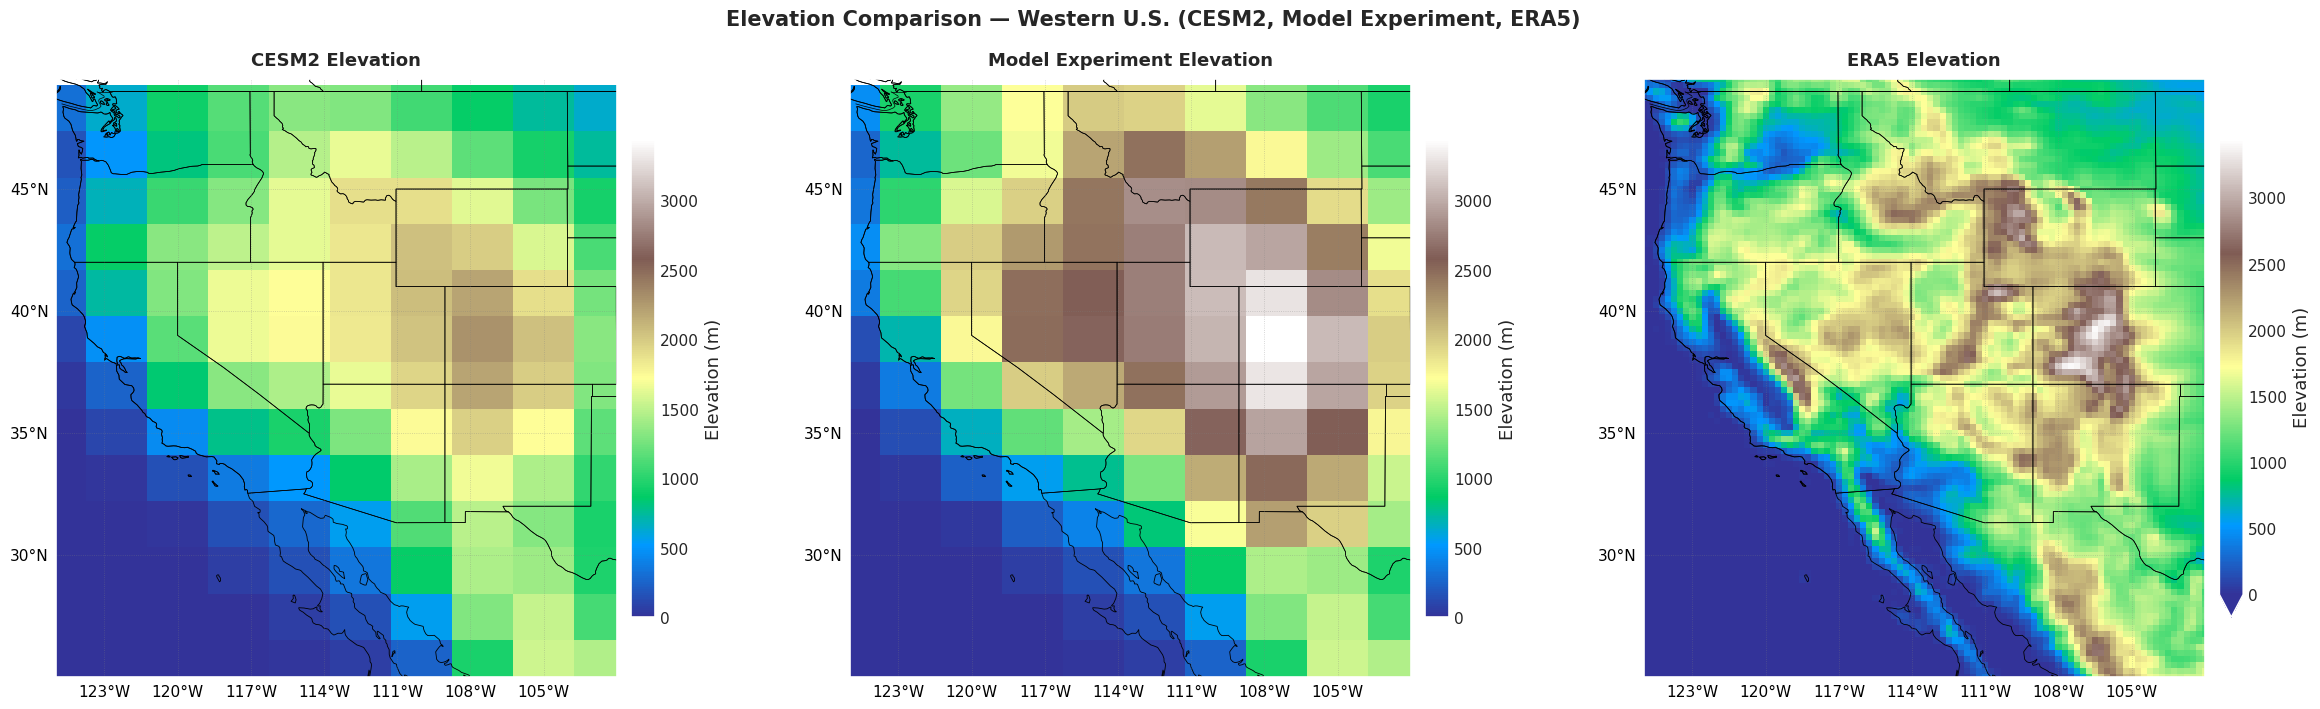


--- Creating Individual Elevation Maps ---
Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/cesm2_elevation_western_us.png


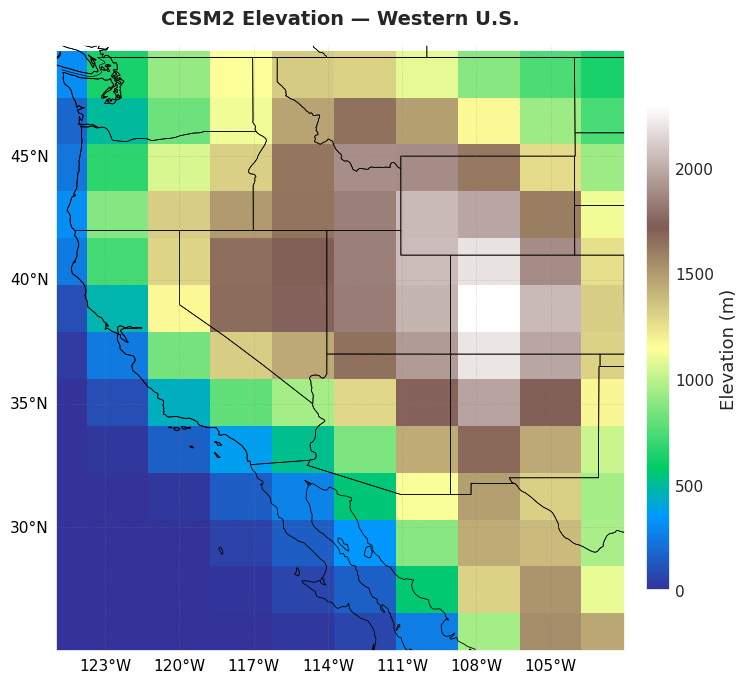

Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/era5_elevation_western_us.png


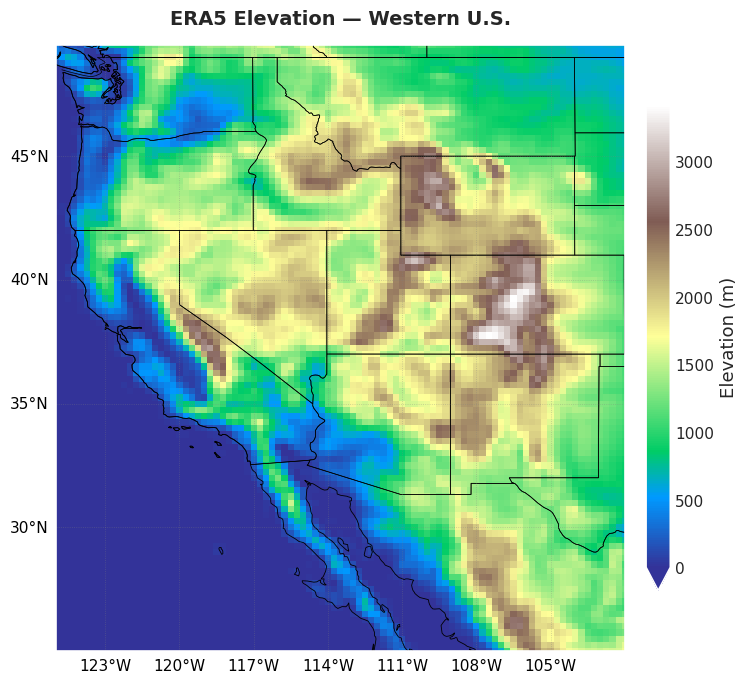

Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/model_exp_elevation_western_us.png


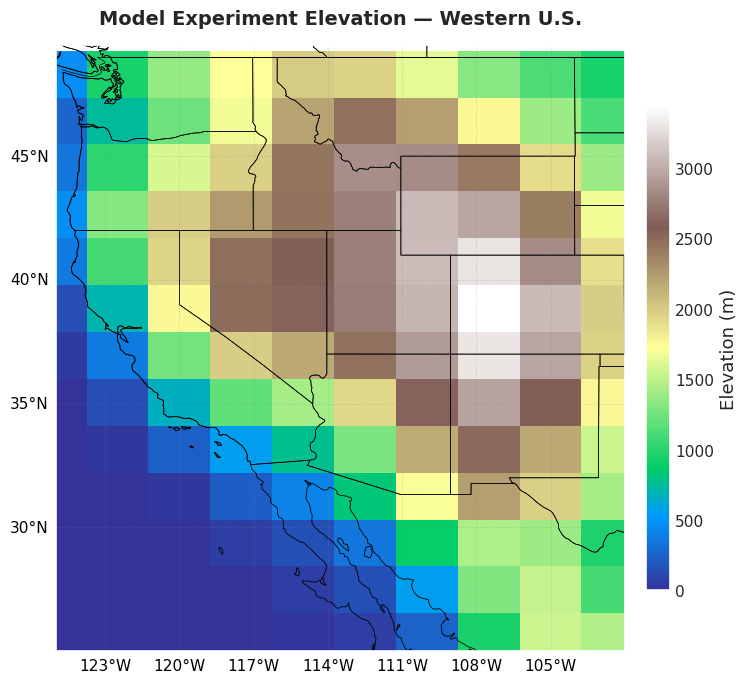

In [ ]:
print("\n" + "=" * 60)
print("LOADING CESM2-FV2 OROGRAPHY DATA")
print("=" * 60)

try:
    # Load CESM2-FV2 orography
    elevation_cesm_west = load_cesm_orography(CESM_OROG_PATH)
    
    # Verify grid alignment with snow data
    if snw_cesm_west is not None:
        print("\n--- Grid Alignment Check ---")
        print(f"Elevation grid shape: {elevation_cesm_west.shape}")
        print(f"SWE grid shape: {snw_cesm_west.shape}")
        print(f"Elevation lat range: {elevation_cesm_west.lat.min().values:.2f} to {elevation_cesm_west.lat.max().values:.2f}")
        print(f"SWE lat range: {snw_cesm_west.lat.min().values:.2f} to {snw_cesm_west.lat.max().values:.2f}")
        print(f"Elevation lon range: {elevation_cesm_west.lon.min().values:.2f} to {elevation_cesm_west.lon.max().values:.2f}")
        print(f"SWE lon range: {snw_cesm_west.lon.min().values:.2f} to {snw_cesm_west.lon.max().values:.2f}")
        
        # Check if grids align
        lat_aligned = (len(elevation_cesm_west.lat) == len(snw_cesm_west.lat)) and \
                     np.allclose(elevation_cesm_west.lat.values, snw_cesm_west.lat.values, rtol=1e-5)
        lon_aligned = (len(elevation_cesm_west.lon) == len(snw_cesm_west.lon)) and \
                     np.allclose(elevation_cesm_west.lon.values, snw_cesm_west.lon.values, rtol=1e-5)
        
        if lat_aligned and lon_aligned:
            print("✓ Grids are aligned - elevation data matches snow data grid")
        else:
            print("⚠ Warning: Grids may not be perfectly aligned. Will interpolate if needed.")
    
    # Load ERA5 geopotential/elevation
    print("\n" + "=" * 60)
    print("LOADING ERA5 GEOPOTENTIAL (ELEVATION) DATA")
    print("=" * 60)
    
    try:
        elevation_era5_west = load_era5_geopotential(ERA5_GEOPOTENTIAL_ROOT, ERA5_GEOPOTENTIAL_FILE)
        
        # Verify grid alignment
        print("\n--- ERA5 Elevation Grid Alignment Check ---")
        print(f"ERA5 Elevation grid shape: {elevation_era5_west.shape}")
        print(f"ERA5 Elevation lat range: {elevation_era5_west.lat.min().values:.2f} to {elevation_era5_west.lat.max().values:.2f}")
        print(f"ERA5 Elevation lon range: {elevation_era5_west.lon.min().values:.2f} to {elevation_era5_west.lon.max().values:.2f}")
        
    except Exception as e:
        print(f"Error loading ERA5 geopotential data: {e}")
        import traceback
        traceback.print_exc()
        elevation_era5_west = None
    
    # Load model experiment topography
    print("\n" + "=" * 60)
    print("LOADING MODEL EXPERIMENT TOPOGRAPHY DATA")
    print("=" * 60)
    
    try:
        elevation_model_exp_west = load_model_experiment_topography(MODEL_EXP_TOPO_PATH)
        
        # Verify grid alignment
        print("\n--- Model Experiment Elevation Grid Alignment Check ---")
        print(f"Model Experiment Elevation grid shape: {elevation_model_exp_west.shape}")
        print(f"Model Experiment Elevation lat range: {elevation_model_exp_west.lat.min().values:.2f} to {elevation_model_exp_west.lat.max().values:.2f}")
        print(f"Model Experiment Elevation lon range: {elevation_model_exp_west.lon.min().values:.2f} to {elevation_model_exp_west.lon.max().values:.2f}")
        
    except Exception as e:
        print(f"Error loading model experiment topography data: {e}")
        import traceback
        traceback.print_exc()
        elevation_model_exp_west = None
    
    # Plot elevation maps - side-by-side comparison
    print("\n--- Creating Elevation Comparison Maps ---")
    # Check which datasets are available
    datasets_available = []
    if elevation_cesm_west is not None:
        datasets_available.append(('CESM2-FV2', elevation_cesm_west))
    if elevation_model_exp_west is not None:
        datasets_available.append(('Model Experiment', elevation_model_exp_west))
    if elevation_era5_west is not None:
        datasets_available.append(('ERA5', elevation_era5_west))
    
    if len(datasets_available) >= 2:
        # Create side-by-side comparison
        n_panels = len(datasets_available)
        fig = plt.figure(figsize=(8 * n_panels, 7))
        
        # Determine common color scale
        vmin = 0
        vmax_vals = []
        for name, data in datasets_available:
            vmax_vals.append(float(data.max(skipna=True).values))
        vmax = max(vmax_vals)
        
        # Plot each dataset
        for idx, (name, data) in enumerate(datasets_available):
            ax = plt.subplot(1, n_panels, idx + 1, projection=ccrs.PlateCarree())
            
            if name == 'ERA5':
                data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='terrain',
                         x="lon", y="lat", add_colorbar=True,
                         cbar_kwargs={"label": "Elevation (m)", "shrink": 0.8, "pad": 0.02}, 
                         vmin=vmin, vmax=vmax)
            else:
                data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='terrain',
                         cbar_kwargs={"label": "Elevation (m)", "shrink": 0.8, "pad": 0.02}, 
                         vmin=vmin, vmax=vmax, add_colorbar=True)
            
            add_map_features(ax)
            ax.set_title(f"{name} Elevation", fontsize=13, fontweight='bold', pad=10)
        
        # Create title based on available datasets
        title_parts = [name for name, _ in datasets_available]
        title = "Elevation Comparison — Western U.S. (" + ", ".join(title_parts) + ")"
        plt.suptitle(title, fontsize=15, fontweight='bold', y=0.98)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        
        # Create filename based on available datasets
        filename_parts = [name.lower().replace(' ', '_') for name, _ in datasets_available]
        filename = "_".join(filename_parts) + "_elevation_comparison.png"
        save_plot(fig, filename)
        plt.show()
        
        # Also create individual plots
        print("\n--- Creating Individual Elevation Maps ---")
        fig, ax = plot_spatial_map(elevation_cesm_west, 
                                    title="CESM2-FV2 Elevation — Western U.S.",
                                    cmap="terrain",
                                    cbar_label="Elevation (m)")
        save_plot(fig, "cesm2_fv2_elevation_western_us.png")
        plt.show()
        
        fig, ax = plot_spatial_map(elevation_era5_west, 
                                    title="ERA5 Elevation — Western U.S.",
                                    cmap="terrain",
                                    cbar_label="Elevation (m)",
                                  vmin=0)
        save_plot(fig, "era5_elevation_western_us.png")
        plt.show()
        
        # Model experiment individual plot
        if elevation_model_exp_west is not None:
            fig, ax = plot_spatial_map(elevation_model_exp_west, 
                                        title="Model Experiment Elevation — Western U.S.",
                                        cmap="terrain",
                                        cbar_label="Elevation (m)")
            save_plot(fig, "model_exp_elevation_western_us.png")
            plt.show()
        
    elif elevation_cesm_west is not None:
        # Only CESM elevation available
        print("\n--- Creating Elevation Map ---")
        fig, ax = plot_spatial_map(elevation_cesm_west, 
                                    title="CESM2-FV2 Elevation — Western U.S.",
                                    cmap="terrain",
                                    cbar_label="Elevation (m)")
        save_plot(fig, "cesm2_fv2_elevation_western_us.png")
        plt.show()
    elif elevation_era5_west is not None:
        # Only ERA5 elevation available
        print("\n--- Creating Elevation Map ---")
        fig, ax = plot_spatial_map(elevation_era5_west, 
                                    title="ERA5 Elevation — Western U.S.",
                                    cmap="terrain",
                                    cbar_label="Elevation (m)")
        save_plot(fig, "era5_elevation_western_us.png")
        plt.show()
    
except Exception as e:
    print(f"Error loading elevation data: {e}")
    import traceback
    traceback.print_exc()
    elevation_cesm_west = None
    elevation_era5_west = None
    elevation_model_exp_west = None


### Load ERA5 Data

In [103]:
print("\n" + "=" * 60)
print("LOADING ERA5 DATA")
print("=" * 60)

# Load ERA5 SWE
try:
    snw_era5, ds_era5_swe = load_era5_swe(ERA5_SWE_ROOT, START_YEAR[:4], END_YEAR[:4])
    print(f"\nERA5 SWE before subsetting - lat: {snw_era5.lat.min().values:.1f} to {snw_era5.lat.max().values:.1f}, lon: {snw_era5.lon.min().values:.1f} to {snw_era5.lon.max().values:.1f}")
    print(f"Shape before subset: {snw_era5.shape}")
    snw_era5_west = subset_western_us(snw_era5)
    
    print("\nERA5 SWE Data Info:")
    print_data_info(snw_era5_west)
    
except Exception as e:
    print(f"Could not load ERA5 SWE data: {e}")
    snw_era5_west = None

# Load ERA5 snowfall
try:
    sf_era5, ds_era5_sf = load_era5_snowfall(ERA5_SNOWFALL_ROOT, START_YEAR[:4], END_YEAR[:4])
    print(f"\nERA5 snowfall before subsetting - lat: {sf_era5.lat.min().values:.1f} to {sf_era5.lat.max().values:.1f}, lon: {sf_era5.lon.min().values:.1f} to {sf_era5.lon.max().values:.1f}")
    print(f"Shape before subset: {sf_era5.shape}")
    sf_era5_west = subset_western_us(sf_era5)
    
    print("\nERA5 Snowfall Data Info:")
    print_data_info(sf_era5_west, 'sf')
    
except Exception as e:
    print(f"Could not load ERA5 snowfall data: {e}")
    sf_era5_west = None


LOADING ERA5 DATA
Loading ERA5 SWE data from /glade/campaign/collections/rda/data/d633001/e5.moda.an.sfc for 1994-2014...
Found 21 ERA5 SWE files
After SWE loading - dimensions: {'time': 252, 'latitude': 721, 'longitude': 1440}
Found variable 'SD' with units: m of water equivalent
Coordinate names: lat=lat, lon=lon
Coordinate ranges: lat -90.0 to 90.0, lon 0.0 to 359.8
Converted meters of water equivalent to kg m⁻²
After longitude normalization: lon -180.0 to 179.8

ERA5 SWE before subsetting - lat: -90.0 to 90.0, lon: -180.0 to 179.8
Shape before subset: (252, 721, 1440)
Subset successful - lat: 25.0 to 49.5, lon: -125.0 to -102.0
Shape after subset: (252, 99, 93)

ERA5 SWE Data Info:
Variable: snw
Units: kg m⁻²
Time range: 1994-01-01T00:00:00.000000000 → 2014-12-01T00:00:00.000000000
Dimensions: ('time', 'lat', 'lon')
Shape: (252, 99, 93)
Value range: 0.00 to 465.30
Fraction NaN: 0.0000
Loading ERA5 snowfall data from /glade/campaign/collections/rda/data/d633001/e5.moda.fc.sfc.accum

### Data Validation and Coverage Check


In [ ]:
print("=" * 60)
print("DATA VALIDATION AND COVERAGE CHECK")
print("=" * 60)

# Helper function to extract scalar timestamp from xarray/numpy/cftime
def get_timestamp(time_val):
    """Extract scalar timestamp value from xarray DataArray, numpy array, or cftime object."""
    val = time_val.values
    if isinstance(val, np.ndarray):
        val = val.item() if val.size == 1 else val[0]
    
    # Handle cftime objects (common in climate data)
    try:
        import cftime
        if isinstance(val, cftime.datetime):
            # Convert cftime to pandas Timestamp via string representation
            return pd.Timestamp(str(val))
    except (ImportError, AttributeError):
        pass
    
    # Try direct conversion for numpy datetime64 or other types
    try:
        return pd.Timestamp(val)
    except (TypeError, ValueError):
        # Fallback: convert to string first
        return pd.Timestamp(str(val))

# Check time period coverage for all datasets
expected_start = pd.Timestamp(START_YEAR)
expected_end = pd.Timestamp(END_YEAR)
expected_months = (expected_end.year - expected_start.year) * 12 + (expected_end.month - expected_start.month) + 1

print(f"\nExpected analysis period: {START_YEAR} to {END_YEAR} ({expected_months} months)")

datasets_to_check = []
if snw_cesm_west is not None:
    datasets_to_check.append(("CESM2-FV2 SWE", snw_cesm_west))
if prsn_cesm_west is not None:
    datasets_to_check.append(("CESM2-FV2 Snowfall", prsn_cesm_west))
if snw_era5_west is not None:
    datasets_to_check.append(("ERA5 SWE", snw_era5_west))
if sf_era5_west is not None:
    datasets_to_check.append(("ERA5 Snowfall", sf_era5_west))

print("\n--- Time Period Coverage ---")
for name, data in datasets_to_check:
    # Extract scalar timestamp values
    data_start = get_timestamp(data.time.min())
    data_end = get_timestamp(data.time.max())
    data_months = len(data.time)
    
    # Check if coverage matches expected period
    start_match = data_start <= expected_start
    end_match = data_end >= expected_end
    coverage_ok = start_match and end_match
    
    status = "✓" if coverage_ok else "⚠"
    print(f"{status} {name}:")
    print(f"    Time range: {data_start.strftime('%Y-%m-%d')} to {data_end.strftime('%Y-%m-%d')} ({data_months} months)")
    if not coverage_ok:
        if not start_match:
            print(f"    ⚠ Warning: Data starts after expected start date ({START_YEAR})")
        if not end_match:
            print(f"    ⚠ Warning: Data ends before expected end date ({END_YEAR})")

# Check for NaN values
print("\n--- NaN Value Check ---")
for name, data in datasets_to_check:
    nan_count = data.isnull().sum().compute().values if hasattr(data.isnull().sum(), 'compute') else data.isnull().sum().values
    total_values = data.size
    nan_fraction = float(nan_count) / total_values if total_values > 0 else 0.0
    print(f"{name}: {nan_fraction:.2%} NaN values ({nan_count}/{total_values})")
    if nan_fraction > 0.1:
        print(f"    ⚠ Warning: High NaN fraction ({nan_fraction:.2%}) may affect analysis")

# Check data availability for comparisons
print("\n--- Comparison Readiness ---")
swe_available = snw_cesm_west is not None and snw_era5_west is not None
snowfall_available = prsn_cesm_west is not None and sf_era5_west is not None

if swe_available:
    # Check time overlap for SWE
    cesm_swe_start = get_timestamp(snw_cesm_west.time.min())
    cesm_swe_end = get_timestamp(snw_cesm_west.time.max())
    era5_swe_start = get_timestamp(snw_era5_west.time.min())
    era5_swe_end = get_timestamp(snw_era5_west.time.max())
    overlap_start = max(cesm_swe_start, era5_swe_start)
    overlap_end = min(cesm_swe_end, era5_swe_end)
    if overlap_start <= overlap_end:
        overlap_months = (overlap_end.year - overlap_start.year) * 12 + (overlap_end.month - overlap_start.month) + 1
        print(f"✓ SWE comparison available: {overlap_start.strftime('%Y-%m')} to {overlap_end.strftime('%Y-%m')} ({overlap_months} months)")
    else:
        print("⚠ SWE comparison not possible: No time overlap between datasets")
else:
    print("⚠ SWE comparison not available: Missing CESM2-FV2 or ERA5 SWE data")

if snowfall_available:
    # Check time overlap for snowfall
    cesm_sf_start = get_timestamp(prsn_cesm_west.time.min())
    cesm_sf_end = get_timestamp(prsn_cesm_west.time.max())
    era5_sf_start = get_timestamp(sf_era5_west.time.min())
    era5_sf_end = get_timestamp(sf_era5_west.time.max())
    overlap_start = max(cesm_sf_start, era5_sf_start)
    overlap_end = min(cesm_sf_end, era5_sf_end)
    if overlap_start <= overlap_end:
        overlap_months = (overlap_end.year - overlap_start.year) * 12 + (overlap_end.month - overlap_start.month) + 1
        print(f"✓ Snowfall comparison available: {overlap_start.strftime('%Y-%m')} to {overlap_end.strftime('%Y-%m')} ({overlap_months} months)")
    else:
        print("⚠ Snowfall comparison not possible: No time overlap between datasets")
else:
    print("⚠ Snowfall comparison not available: Missing CESM2-FV2 or ERA5 snowfall data")

print("\n" + "=" * 60)


## Analysis and Visualization

### SWE Spatial Comparison

### Snowfall Spatial Comparison


--- CESM2 Snowfall Analysis ---
Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/cesm2_swe_djf_climatology_1994-2014.png


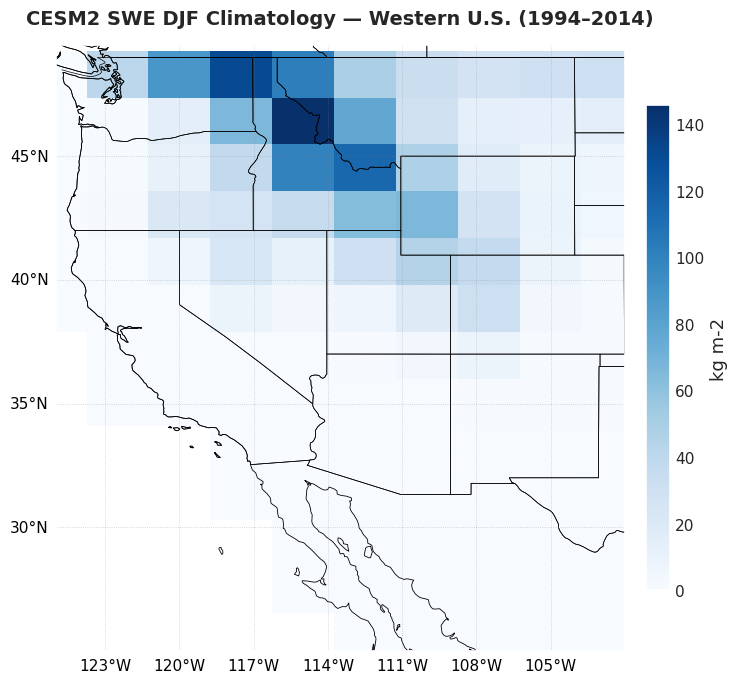

Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/cesm2_snowfall_djf_climatology_1994-2014.png


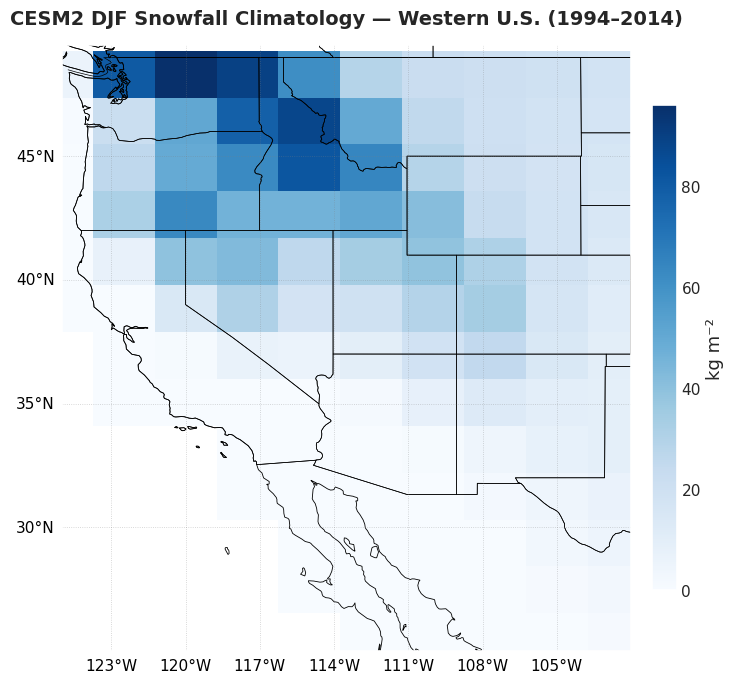


--- ERA5 SWE Analysis ---
Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/era5_swe_djf_climatology_1994-2014.png


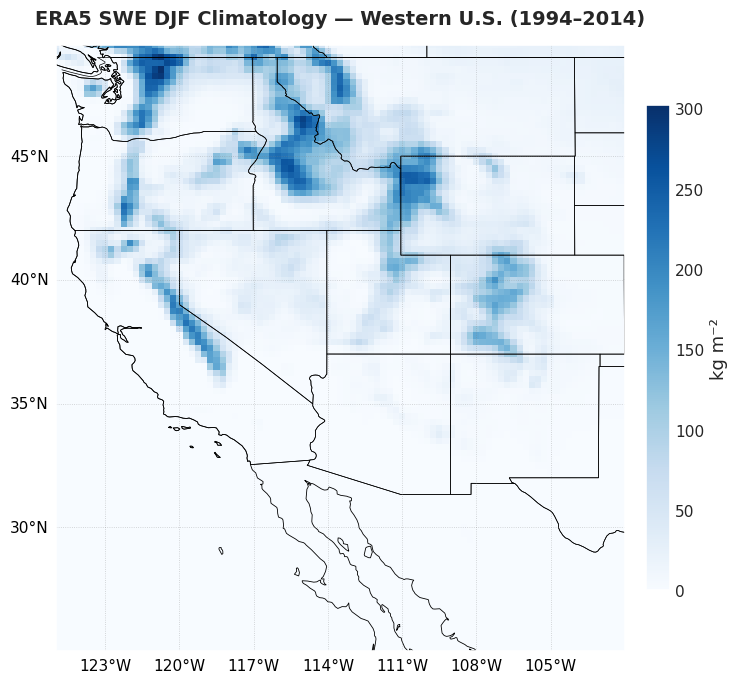


--- ERA5 Snowfall Analysis ---
Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/era5_snowfall_djf_climatology_1994-2014.png


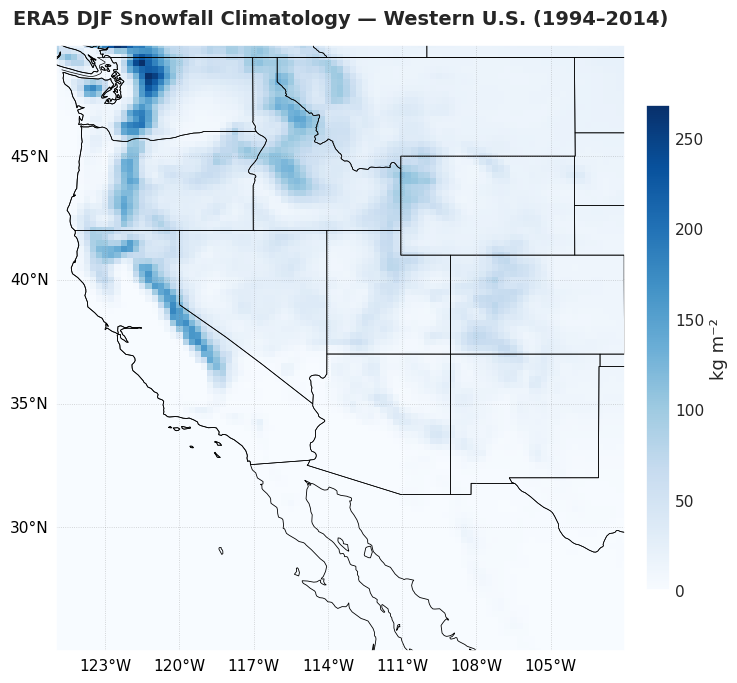

In [104]:
if prsn_cesm_west is not None:
    print("\n--- CESM2 Snowfall Analysis ---")

    # CESM2 SWE DJF climatology
    # DJF climatology
    djf = snw_cesm_west.where(snw_cesm_west.time.dt.month.isin([12, 1, 2]))
    snw_djf_clim = djf.groupby("time.season").mean("time").sel(season="DJF")
    
    # Plot DJF climatology
    fig, ax = plot_spatial_map(snw_djf_clim, title="CESM2 SWE DJF Climatology — Western U.S. (1994–2014)")
    save_plot(fig, "cesm2_swe_djf_climatology_1994-2014.png")
    plt.show()

    
    # Area-weighted time series
    weights = np.cos(np.deg2rad(prsn_cesm_west.lat))
    snowfall_ts = prsn_cesm_west.weighted(weights).mean(["lat", "lon"])
    snowfall_ann = snowfall_ts.resample(time="1Y").sum()
    
    # DJF snowfall climatology
    djf_snowfall = prsn_cesm_west.where(prsn_cesm_west.time.dt.month.isin([12, 1, 2]))
    snowfall_djf_clim = djf_snowfall.groupby("time.season").mean("time").sel(season="DJF")
    
    # Plot DJF climatology
    fig, ax = plot_spatial_map(snowfall_djf_clim, title="CESM2 DJF Snowfall Climatology — Western U.S. (1994–2014)")
    save_plot(fig, "cesm2_snowfall_djf_climatology_1994-2014.png")
    plt.show()

# ============================================================================
# ERA5 SWE ANALYSIS
# ============================================================================

if snw_era5_west is not None:
    print("\n--- ERA5 SWE Analysis ---")
    
    # Area-weighted time series
    weights = np.cos(np.deg2rad(snw_era5_west.lat))
    snw_reg_mon = snw_era5_west.weighted(weights).mean(["lat", "lon"])
    snw_reg_ann = snw_reg_mon.resample(time="1Y").mean()
    
    # DJF SWE climatology
    djf = snw_era5_west.where(snw_era5_west.time.dt.month.isin([12, 1, 2]))
    snw_djf_clim = djf.groupby("time.season").mean("time").sel(season="DJF")
    
    # Plot DJF climatology
    fig, ax = plot_spatial_map(snw_djf_clim, title="ERA5 SWE DJF Climatology — Western U.S. (1994–2014)")
    save_plot(fig, "era5_swe_djf_climatology_1994-2014.png")
    plt.show()

# ============================================================================
# ERA5 SNOWFALL ANALYSIS
# ============================================================================

if sf_era5_west is not None:
    print("\n--- ERA5 Snowfall Analysis ---")
    
    # Area-weighted time series
    weights = np.cos(np.deg2rad(sf_era5_west.lat))
    snowfall_ts = sf_era5_west.weighted(weights).mean(["lat", "lon"])
    snowfall_ann = snowfall_ts.resample(time="1Y").sum()
    
    # DJF snowfall climatology
    djf_snowfall = sf_era5_west.where(sf_era5_west.time.dt.month.isin([12, 1, 2]))
    snowfall_djf_clim = djf_snowfall.groupby("time.season").mean("time").sel(season="DJF")
    
    # Plot DJF climatology
    fig, ax = plot_spatial_map(snowfall_djf_clim, title="ERA5 DJF Snowfall Climatology — Western U.S. (1994–2014)")
    save_plot(fig, "era5_snowfall_djf_climatology_1994-2014.png")
    plt.show()


### Variable and Elevation Difference Comparison


CESM2 CONTROL vs ERA5 COMPARISON

--- Spatial Comparison (DJF Climatology) ---
Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/cesm2_era5_swe_comparison_maps_djf_1994-2014.png


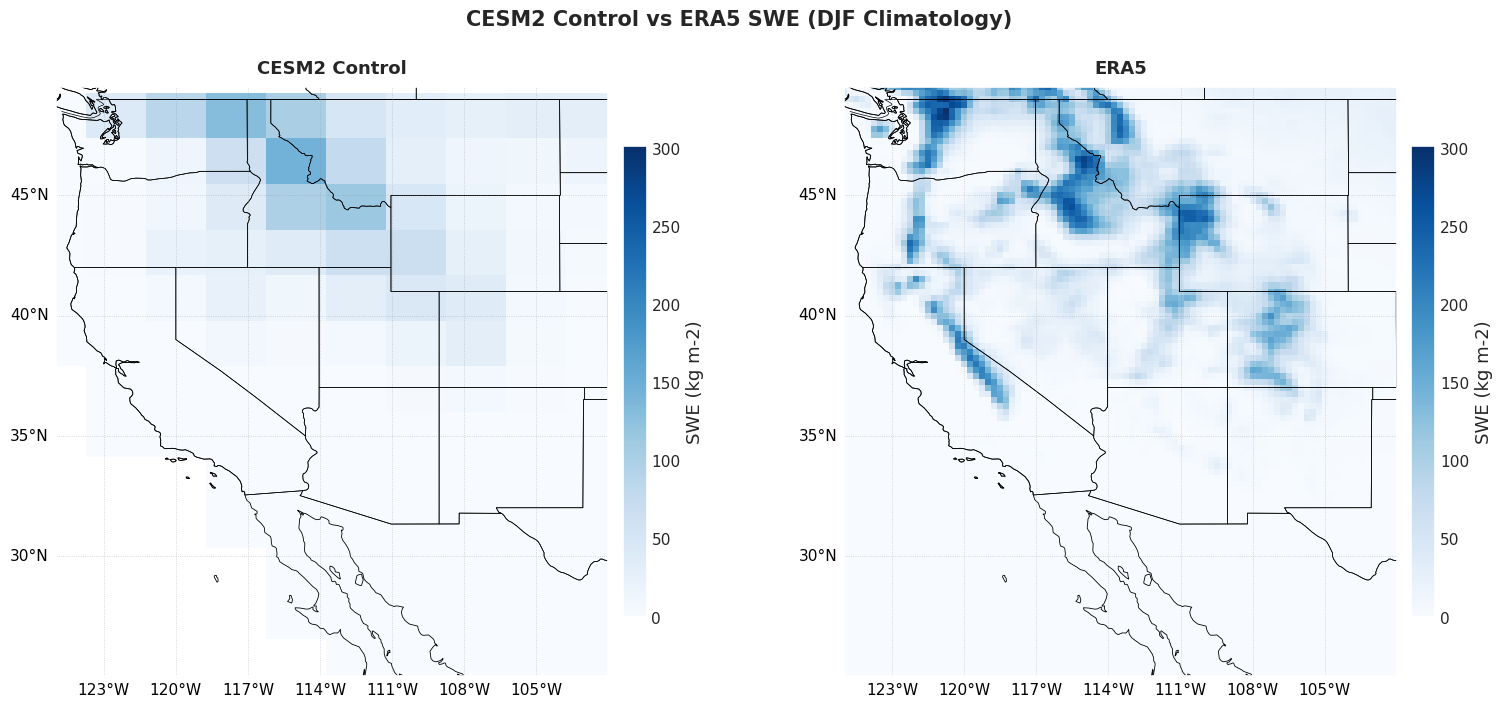


--- Difference Map (DJF Climatology) ---
Reusing existing regridding weights from: /glade/u/home/afinnell/ATOC4870/final_project/data/weights/era5_to_cesm_weights_bilinear.nc
Difference map may be less accurate.
Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/cesm2_era5_swe_difference_djf_1994-2014.png


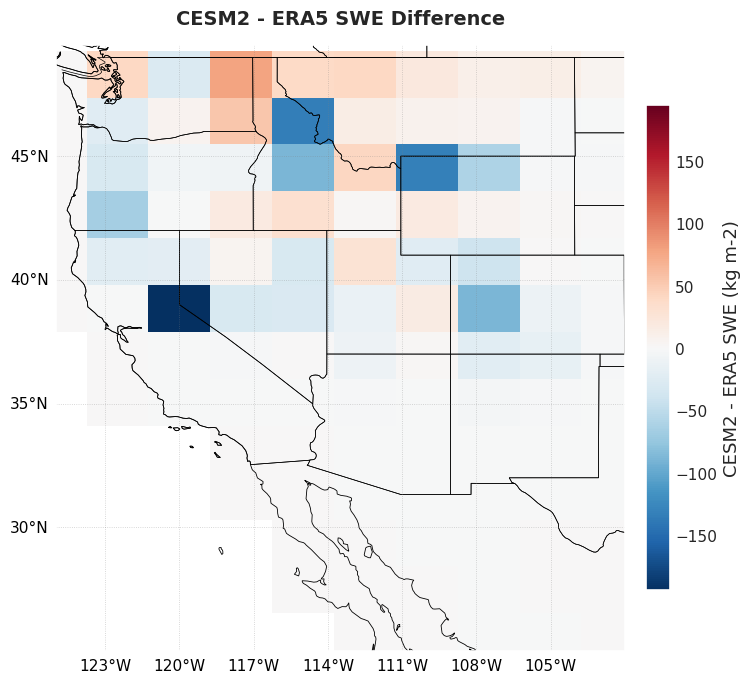

In [ ]:
if snw_era5_west is not None and snw_cesm_west is not None:
    print("\n" + "=" * 60)
    print("CESM2-FV2 vs ERA5 COMPARISON")
    print("=" * 60)
    
    # Spatial comparison - use DJF climatology
    print("\n--- Spatial Comparison (DJF Climatology) ---")
    cesm_djf = snw_cesm_west.where(snw_cesm_west.time.dt.month.isin([12, 1, 2])).groupby("time.season").mean("time").sel(season="DJF")
    era5_djf = snw_era5_west.where(snw_era5_west.time.dt.month.isin([12, 1, 2])).groupby("time.season").mean("time").sel(season="DJF")
    
    fig, axes = plot_comparison_maps(cesm_djf, era5_djf, title="CESM2-FV2 vs ERA5 SWE (DJF Climatology)", variable_name="SWE")
    save_plot(fig, f"cesm2_era5_swe_comparison_maps_djf_{START_YEAR[:4]}-{END_YEAR[:4]}.png")
    plt.show()
    
    # Difference map
    print("\n--- Difference Map (DJF Climatology) ---")
    fig, ax = plot_difference_map(cesm_djf, era5_djf, variable_name="SWE", regrid_method='bilinear')
    save_plot(fig, f"cesm2_era5_swe_difference_djf_{START_YEAR[:4]}-{END_YEAR[:4]}.png")
    plt.show()
    
else:
    print("ERA5 or CESM2 data not available - skipping comparison analysis")

## Save Processed Data


CESM2 CONTROL vs ERA5 SNOWFALL COMPARISON

--- Spatial Comparison (DJF Climatology) ---
Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/cesm2_era5_snowfall_comparison_maps_djf_1994-2014.png


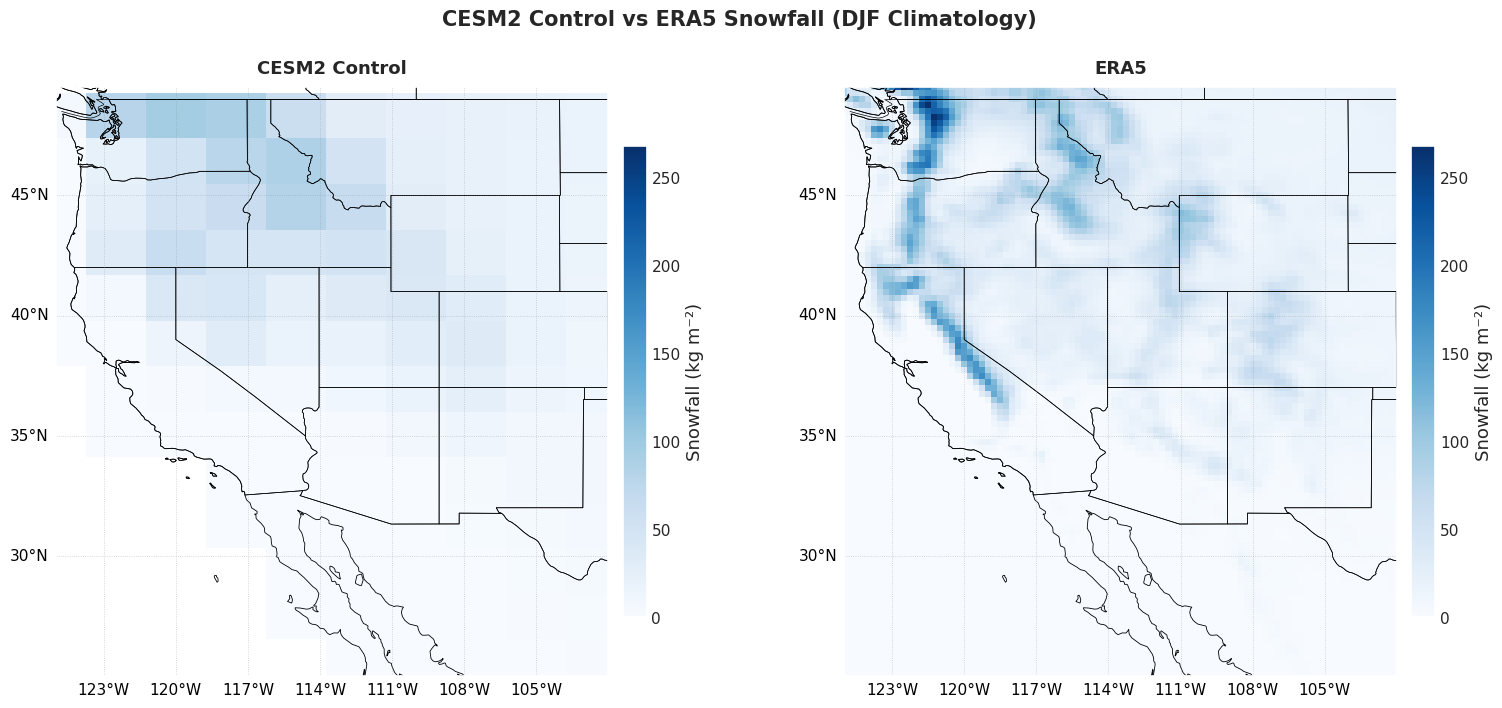


--- Difference Map (DJF Climatology) ---
Reusing existing regridding weights from: /glade/u/home/afinnell/ATOC4870/final_project/data/weights/era5_to_cesm_weights_conservative_normed.nc
Difference map may be less accurate.
Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/cesm2_era5_snowfall_difference_djf_1994-2014.png


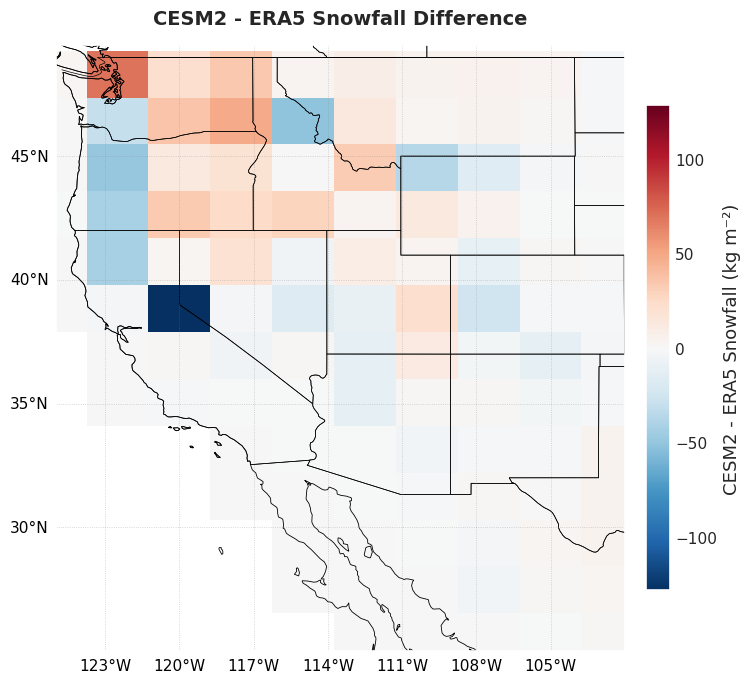

In [ ]:
if prsn_cesm_west is not None and sf_era5_west is not None:
    print("\n" + "=" * 60)
    print("CESM2-FV2 vs ERA5 SNOWFALL COMPARISON")
    print("=" * 60)
    
    # Spatial comparison - use DJF climatology
    print("\n--- Spatial Comparison (DJF Climatology) ---")
    cesm_sf_djf = prsn_cesm_west.where(prsn_cesm_west.time.dt.month.isin([12, 1, 2])).groupby("time.season").mean("time").sel(season="DJF")
    era5_sf_djf = sf_era5_west.where(sf_era5_west.time.dt.month.isin([12, 1, 2])).groupby("time.season").mean("time").sel(season="DJF")
    
    fig, axes = plot_comparison_maps(cesm_sf_djf, era5_sf_djf, title="CESM2-FV2 vs ERA5 Snowfall (DJF Climatology)", variable_name="Snowfall")
    save_plot(fig, f"cesm2_era5_snowfall_comparison_maps_djf_{START_YEAR[:4]}-{END_YEAR[:4]}.png")
    plt.show()
    
    # Difference map
    print("\n--- Difference Map (DJF Climatology) ---")
    fig, ax = plot_difference_map(cesm_sf_djf, era5_sf_djf, regrid_method='conservative_normed', variable_name="Snowfall")
    save_plot(fig, f"cesm2_era5_snowfall_difference_djf_{START_YEAR[:4]}-{END_YEAR[:4]}.png")
    plt.show()
    
    # Statistics
else:
    print("ERA5 or CESM2 snowfall data not available - skipping snowfall comparison analysis")


## Elevation Difference Analysis

This section quantitatively analyzes elevation differences between CESM2 and ERA5, and their relationship to snow differences.


ELEVATION DIFFERENCE ANALYSIS
Reusing existing regridding weights from: /glade/u/home/afinnell/ATOC4870/final_project/data/weights/era5_to_cesm_weights_bilinear.nc
Difference map may be less accurate.

Elevation Difference Statistics (CESM2 - ERA5):
  Mean bias: 7.2 m
  RMSE: 275.9 m
  Range: -963.1 to 725.3 m
Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/cesm2_era5_elevation_difference.png


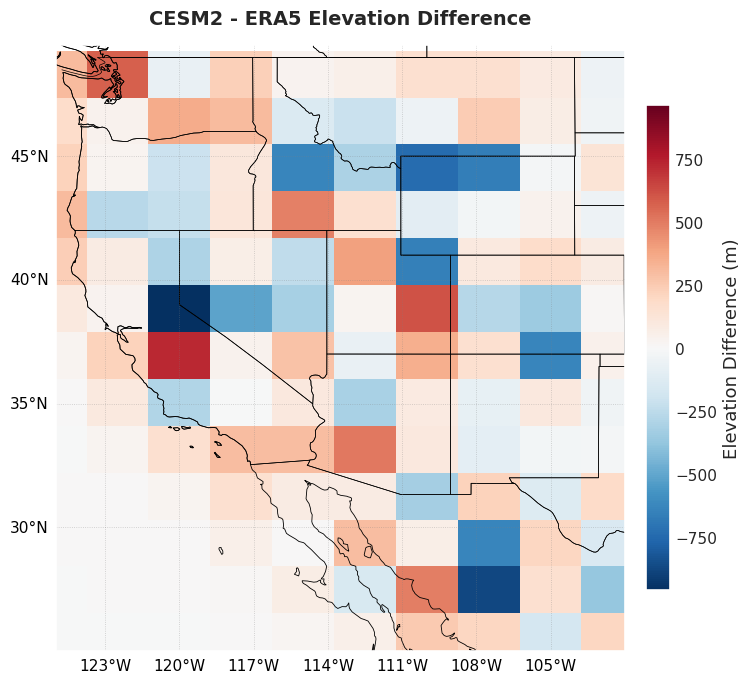

In [107]:
if elevation_cesm_west is not None and elevation_era5_west is not None:
    print("\n" + "=" * 60)
    print("ELEVATION DIFFERENCE ANALYSIS")
    print("=" * 60)
    
    # Regrid ERA5 elevation to CESM2 grid for comparison
    try:
        elevation_era5_on_cesm = regrid_to_cesm_grid(elevation_era5_west, elevation_cesm_west, method='bilinear')
        
        # Compute elevation difference
        elev_diff = elevation_cesm_west - elevation_era5_on_cesm
        
        # Compute statistics
        elev_bias = float(elev_diff.mean(skipna=True).values)
        elev_rmse = float(np.sqrt((elev_diff ** 2).mean(skipna=True)).values)
        elev_min = float(elev_diff.min(skipna=True).values)
        elev_max = float(elev_diff.max(skipna=True).values)
        
        print(f"\nElevation Difference Statistics (CESM2 - ERA5):")
        print(f"  Mean bias: {elev_bias:.1f} m")
        print(f"  RMSE: {elev_rmse:.1f} m")
        print(f"  Range: {elev_min:.1f} to {elev_max:.1f} m")
        
        # Plot elevation difference map
        fig, ax = plot_spatial_map(elev_diff, 
                                    title="CESM2 - ERA5 Elevation Difference",
                                    cmap="RdBu_r",
                                    cbar_label="Elevation Difference (m)")
        save_plot(fig, "cesm2_era5_elevation_difference.png")
        plt.show()
        
    except Exception as e:
        print(f"Warning: Failed to compute elevation difference: {e}")
        import traceback
        traceback.print_exc()
        elev_diff = None
else:
    print("Elevation data not available - skipping elevation difference analysis")
    elev_diff = None

### Elevation-Stratified Bias Analysis

Analyze how model biases vary with elevation. This helps test the hypothesis that elevation smoothing in CESM2 leads to snow biases.

In [108]:
# Define elevation bins for visual stratification
elevation_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 5000]

if snw_cesm_west is not None and snw_era5_west is not None and elevation_cesm_west is not None:
    print("\n" + "=" * 60)
    print("ELEVATION-STRATIFIED SWE ANALYSIS (Visual Comparison)")
    print("=" * 60)
    
    # Use DJF climatology for analysis
    cesm_swe_djf = snw_cesm_west.where(snw_cesm_west.time.dt.month.isin([12, 1, 2])).groupby("time.season").mean("time").sel(season="DJF")
    era5_swe_djf = snw_era5_west.where(snw_era5_west.time.dt.month.isin([12, 1, 2])).groupby("time.season").mean("time").sel(season="DJF")
    
    # Regrid ERA5 to CESM grid
    era5_swe_djf_regridded = regrid_to_cesm_grid(era5_swe_djf, cesm_swe_djf, method='bilinear')
    
    # Compute difference
    swe_diff = cesm_swe_djf - era5_swe_djf_regridded
    
    # Create visual comparison maps for different elevation ranges
    print("\n--- Creating Elevation-Stratified Difference Maps ---")
    
    # Ensure elevation is aligned with difference data
    if not (np.allclose(swe_diff.lat.values, elevation_cesm_west.lat.values, rtol=1e-5) and
            np.allclose(swe_diff.lon.values, elevation_cesm_west.lon.values, rtol=1e-5)):
        elevation_aligned = elevation_cesm_west.interp(lat=swe_diff.lat, lon=swe_diff.lon)
    else:
        elevation_aligned = elevation_cesm_west
    
    # Create maps for each elevation bin
    n_bins = len(elevation_bins) - 1
    n_cols = min(3, n_bins)
    n_rows = (n_bins + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(6 * n_cols, 5 * n_rows))
    
    valid_bins = []
    for i in range(n_bins):
        bin_min = elevation_bins[i]
        bin_max = elevation_bins[i + 1]
        label = f"{bin_min:.0f}-{bin_max:.0f}m"
        
        # Create mask for this elevation bin
        mask = (elevation_aligned >= bin_min) & (elevation_aligned < bin_max)
        
        # Apply mask to difference data
        diff_masked = swe_diff.where(mask)
        
        # Check if there's valid data
        if diff_masked.notnull().any():
            valid_bins.append((i, label, diff_masked))
    
    if len(valid_bins) == 0:
        print("Warning: No valid data in any elevation bin.")
    else:
        for idx, (bin_idx, label, diff_masked) in enumerate(valid_bins):
            ax = plt.subplot(n_rows, n_cols, idx + 1, projection=ccrs.PlateCarree())
            
            # Plot masked difference
            diff_masked.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r',
                            cbar_kwargs={"label": "SWE Difference (kg m⁻²)", "shrink": 0.8, "pad": 0.02},
                            add_colorbar=True, center=0)
            
            add_map_features(ax, add_labels=(idx == 0))
            ax.set_title(f"{label}", fontsize=12, fontweight='bold', pad=10)
        
        plt.suptitle("SWE Difference by Elevation Range (CESM2 - ERA5, DJF)", 
                     fontsize=14, fontweight='bold', y=0.98)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        save_plot(fig, "swe_difference_by_elevation_visual.png")
        plt.show()
        
        print(f"\nCreated visual comparison maps for {len(valid_bins)} elevation ranges")

if prsn_cesm_west is not None and sf_era5_west is not None and elevation_cesm_west is not None:
    print("\n" + "=" * 60)
    print("ELEVATION-STRATIFIED SNOWFALL ANALYSIS (Visual Comparison)")
    print("=" * 60)
    
    # Use DJF climatology
    cesm_sf_djf = prsn_cesm_west.where(prsn_cesm_west.time.dt.month.isin([12, 1, 2])).groupby("time.season").mean("time").sel(season="DJF")
    era5_sf_djf = sf_era5_west.where(sf_era5_west.time.dt.month.isin([12, 1, 2])).groupby("time.season").mean("time").sel(season="DJF")
    
    # Regrid ERA5 to CESM grid using conservative method for snowfall
    era5_sf_djf_regridded = regrid_to_cesm_grid(era5_sf_djf, cesm_sf_djf, method='conservative_normed')
    
    # Compute difference
    sf_diff = cesm_sf_djf - era5_sf_djf_regridded
    
    # Create visual comparison maps for different elevation ranges
    print("\n--- Creating Elevation-Stratified Difference Maps ---")
    
    # Ensure elevation is aligned with difference data
    if not (np.allclose(sf_diff.lat.values, elevation_cesm_west.lat.values, rtol=1e-5) and
            np.allclose(sf_diff.lon.values, elevation_cesm_west.lon.values, rtol=1e-5)):
        elevation_aligned = elevation_cesm_west.interp(lat=sf_diff.lat, lon=sf_diff.lon)
    else:
        elevation_aligned = elevation_cesm_west
    
    # Create maps for each elevation bin
    n_bins = len(elevation_bins) - 1
    n_cols = min(3, n_bins)
    n_rows = (n_bins + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(6 * n_cols, 5 * n_rows))
    
    valid_bins = []
    for i in range(n_bins):
        bin_min = elevation_bins[i]
        bin_max = elevation_bins[i + 1]
        label = f"{bin_min:.0f}-{bin_max:.0f}m"
        
        # Create mask for this elevation bin
        mask = (elevation_aligned >= bin_min) & (elevation_aligned < bin_max)
        
        # Apply mask to difference data
        diff_masked = sf_diff.where(mask)
        
        # Check if there's valid data
        if diff_masked.notnull().any():
            valid_bins.append((i, label, diff_masked))
    
    if len(valid_bins) == 0:
        print("Warning: No valid data in any elevation bin.")
    else:
        for idx, (bin_idx, label, diff_masked) in enumerate(valid_bins):
            ax = plt.subplot(n_rows, n_cols, idx + 1, projection=ccrs.PlateCarree())
            
            # Plot masked difference
            diff_masked.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r',
                            cbar_kwargs={"label": "Snowfall Difference (kg m⁻²)", "shrink": 0.8, "pad": 0.02},
                            add_colorbar=True, center=0)
            
            add_map_features(ax, add_labels=(idx == 0))
            ax.set_title(f"{label}", fontsize=12, fontweight='bold', pad=10)
        
        plt.suptitle("Snowfall Difference by Elevation Range (CESM2 - ERA5, DJF)", 
                     fontsize=14, fontweight='bold', y=0.98)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        save_plot(fig, "snowfall_difference_by_elevation_visual.png")
        plt.show()
        
        print(f"\nCreated visual comparison maps for {len(valid_bins)} elevation ranges")


ELEVATION-STRATIFIED SWE ANALYSIS (Visual Comparison)
Reusing existing regridding weights from: /glade/u/home/afinnell/ATOC4870/final_project/data/weights/era5_to_cesm_weights_bilinear.nc
Difference map may be less accurate.

--- Creating Elevation-Stratified Difference Maps ---

ELEVATION-STRATIFIED SNOWFALL ANALYSIS (Visual Comparison)
Reusing existing regridding weights from: /glade/u/home/afinnell/ATOC4870/final_project/data/weights/era5_to_cesm_weights_conservative_normed.nc
Difference map may be less accurate.

--- Creating Elevation-Stratified Difference Maps ---


<Figure size 1800x1500 with 0 Axes>

<Figure size 1800x1500 with 0 Axes>

In [109]:
# Validate mass conservation for snowfall regridding
if prsn_cesm_west is not None and sf_era5_west is not None:
    print("\n" + "=" * 60)
    print("REGRIDDING VALIDATION: MASS CONSERVATION CHECK")
    print("=" * 60)
    
    # Use DJF climatology
    era5_sf_djf = sf_era5_west.where(sf_era5_west.time.dt.month.isin([12, 1, 2])).groupby("time.season").mean("time").sel(season="DJF")
    cesm_sf_djf = prsn_cesm_west.where(prsn_cesm_west.time.dt.month.isin([12, 1, 2])).groupby("time.season").mean("time").sel(season="DJF")
    
    # Compute area-weighted domain totals before regridding
    era5_weights = np.cos(np.deg2rad(era5_sf_djf.lat))
    era5_total_before = (era5_sf_djf * era5_weights).sum(["lat", "lon"]).values
    
    # Regrid using conservative method
    era5_sf_regridded = regrid_to_cesm_grid(era5_sf_djf, cesm_sf_djf, method='conservative_normed')
    
    # Compute area-weighted domain totals after regridding
    cesm_weights = np.cos(np.deg2rad(cesm_sf_djf.lat))
    era5_total_after = (era5_sf_regridded * cesm_weights).sum(["lat", "lon"]).values
    
    # Calculate relative difference
    mass_diff_pct = 100 * (era5_total_after - era5_total_before) / era5_total_before
    
    print(f"\nMass Conservation Check (Snowfall):")
    print(f"  Domain total before regridding: {float(era5_total_before):.2e} kg m⁻²")
    print(f"  Domain total after regridding: {float(era5_total_after):.2e} kg m⁻²")
    print(f"  Relative difference: {float(mass_diff_pct):.3f}%")
    
    if abs(mass_diff_pct) < 1.0:
        print("  ✓ Mass conservation is good (< 1% difference)")
    elif abs(mass_diff_pct) < 5.0:
        print("  ⚠ Moderate mass difference (1-5%)")
    else:
        print("  ✗ Large mass difference (> 5%) - check regridding!")


REGRIDDING VALIDATION: MASS CONSERVATION CHECK
Reusing existing regridding weights from: /glade/u/home/afinnell/ATOC4870/final_project/data/weights/era5_to_cesm_weights_conservative_normed.nc
Difference map may be less accurate.

Mass Conservation Check (Snowfall):
  Domain total before regridding: 1.31e+05 kg m⁻²
  Domain total after regridding: 1.57e+03 kg m⁻²
  Relative difference: -98.804%
  ✗ Large mass difference (> 5%) - check regridding!


### Correlation Analysis: Elevation Differences vs Snow Differences

Test the hypothesis that elevation smoothing in CESM2 causes snow biases by correlating elevation differences with snow differences.


CORRELATION ANALYSIS: SWE DIFFERENCES vs ELEVATION DIFFERENCES
Reusing existing regridding weights from: /glade/u/home/afinnell/ATOC4870/final_project/data/weights/era5_to_cesm_weights_bilinear.nc
Difference map may be less accurate.

Correlation coefficient: 0.551
P-value: 1.34e-09
Number of valid points: 104
Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/swe_elevation_correlation_scatter.png


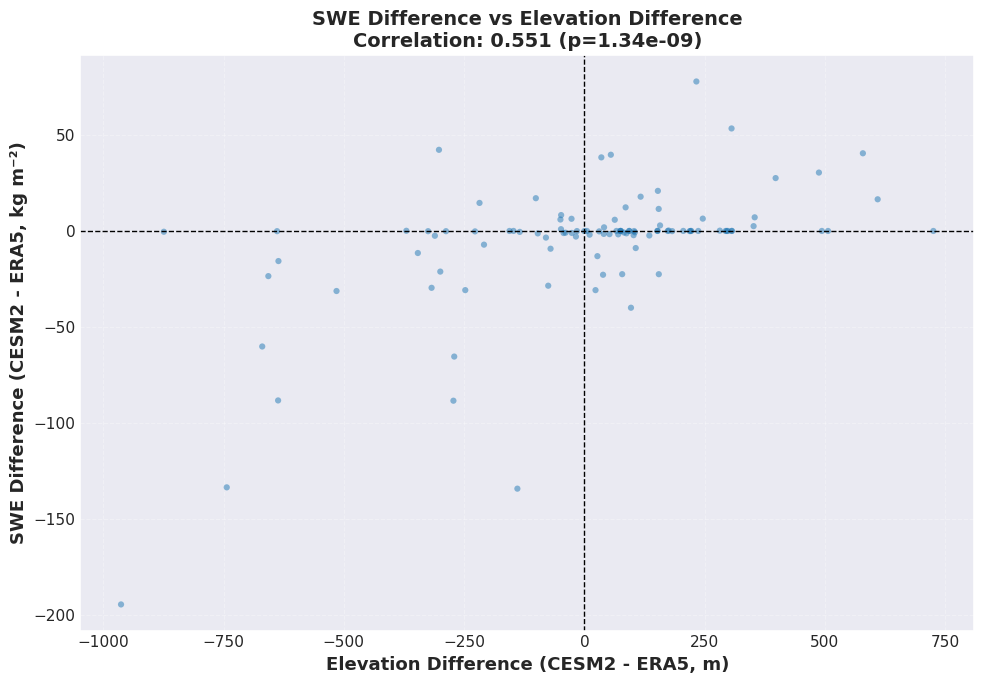

Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/swe_elevation_difference_comparison.png


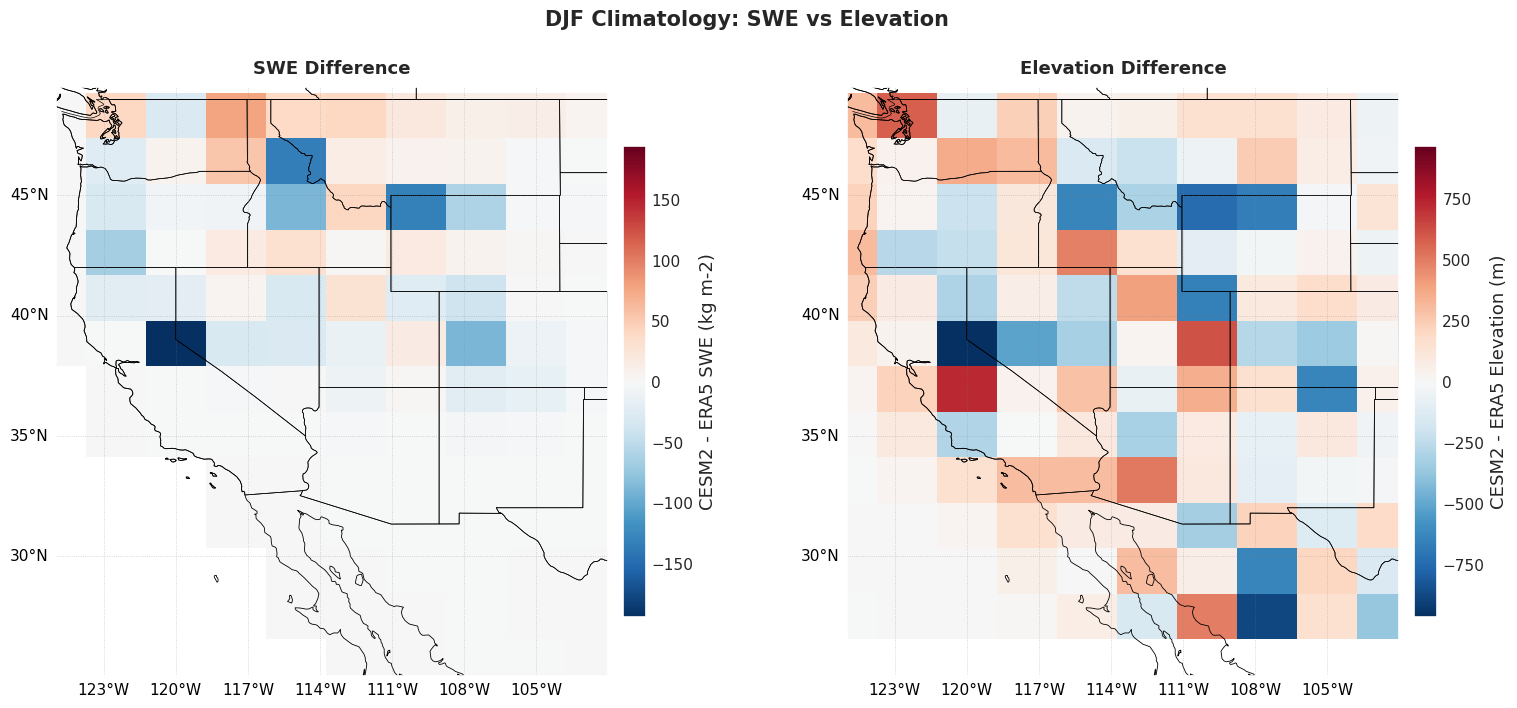


CORRELATION ANALYSIS: SNOWFALL DIFFERENCES vs ELEVATION DIFFERENCES
Reusing existing regridding weights from: /glade/u/home/afinnell/ATOC4870/final_project/data/weights/era5_to_cesm_weights_conservative_normed.nc
Difference map may be less accurate.

Correlation coefficient: 0.453
P-value: 1.37e-06
Number of valid points: 104
Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/snowfall_elevation_correlation_scatter.png


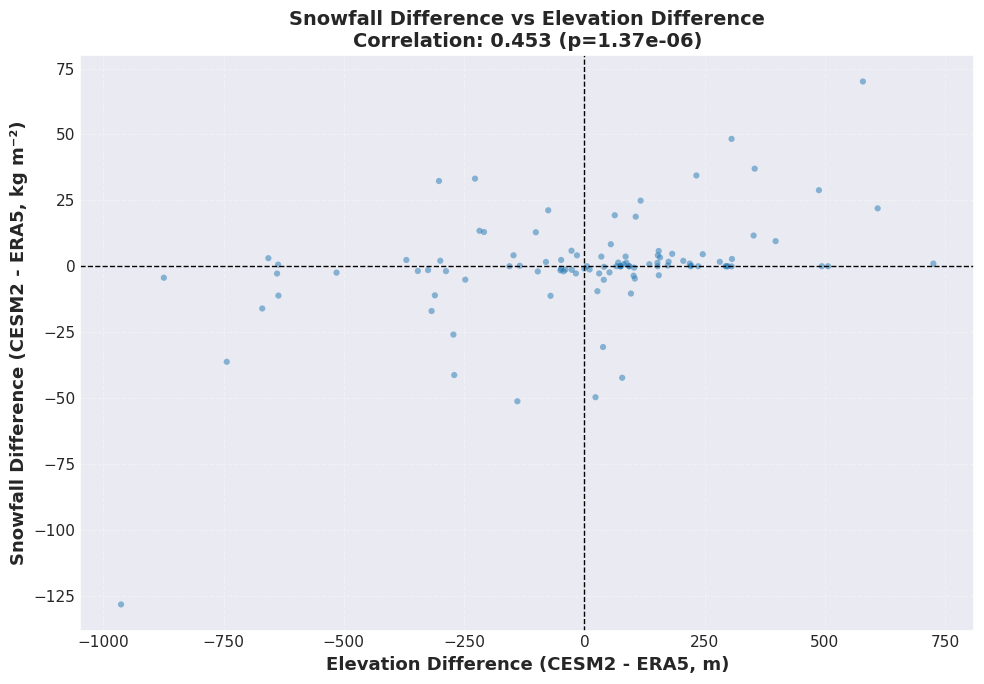

Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/snowfall_elevation_difference_comparison.png


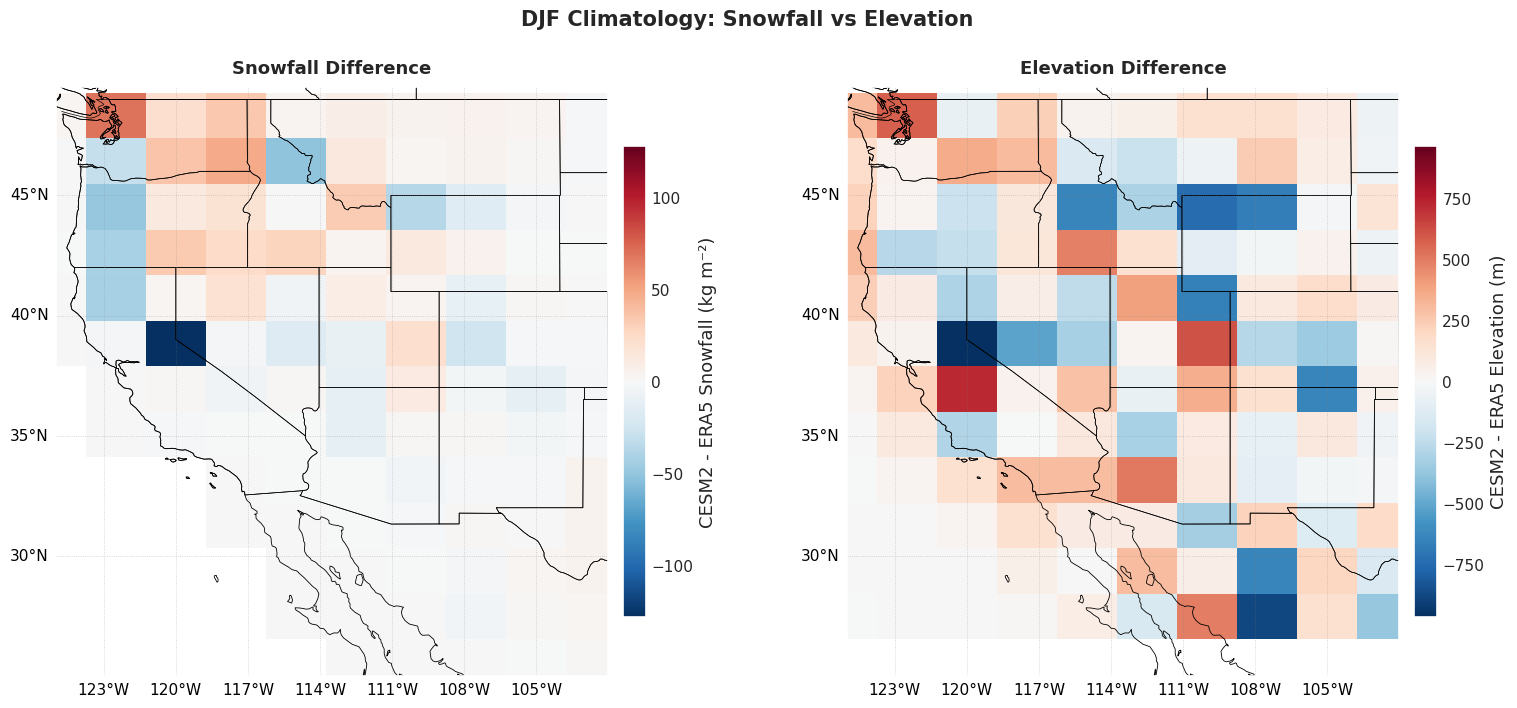

In [110]:
if snw_cesm_west is not None and snw_era5_west is not None and elev_diff is not None:
    print("\n" + "=" * 60)
    print("CORRELATION ANALYSIS: SWE DIFFERENCES vs ELEVATION DIFFERENCES")
    print("=" * 60)
    
    # Use DJF climatology
    cesm_swe_djf = snw_cesm_west.where(snw_cesm_west.time.dt.month.isin([12, 1, 2])).groupby("time.season").mean("time").sel(season="DJF")
    era5_swe_djf = snw_era5_west.where(snw_era5_west.time.dt.month.isin([12, 1, 2])).groupby("time.season").mean("time").sel(season="DJF")
    
    # Regrid ERA5 to CESM grid
    era5_swe_djf_regridded = regrid_to_cesm_grid(era5_swe_djf, cesm_swe_djf, method='bilinear')
    
    # Compute SWE difference
    swe_diff = cesm_swe_djf - era5_swe_djf_regridded
    
    # Ensure elevation difference is on same grid
    elev_diff_aligned = elev_diff.interp(lat=swe_diff.lat, lon=swe_diff.lon)
    
    # Flatten and remove NaN
    swe_flat = swe_diff.values.flatten()
    elev_flat = elev_diff_aligned.values.flatten()
    valid = ~(np.isnan(swe_flat) | np.isnan(elev_flat))
    swe_flat = swe_flat[valid]
    elev_flat = elev_flat[valid]
    
    if len(swe_flat) > 0:
        # Compute correlation
        from scipy.stats import pearsonr
        corr_coef, p_value = pearsonr(elev_flat, swe_flat)
        
        print(f"\nCorrelation coefficient: {corr_coef:.3f}")
        print(f"P-value: {p_value:.2e}")
        print(f"Number of valid points: {len(swe_flat)}")
        
        # Create scatter plot
        fig, ax = plt.subplots(figsize=(10, 7))
        ax.scatter(elev_flat, swe_flat, alpha=0.5, s=20, edgecolors='none')
        ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
        ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
        ax.set_xlabel('Elevation Difference (CESM2 - ERA5, m)', fontsize=13, fontweight='bold')
        ax.set_ylabel('SWE Difference (CESM2 - ERA5, kg m⁻²)', fontsize=13, fontweight='bold')
        ax.set_title(f'SWE Difference vs Elevation Difference\nCorrelation: {corr_coef:.3f} (p={p_value:.2e})', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3, linestyle='--')
        plt.tight_layout()
        save_plot(fig, "swe_elevation_correlation_scatter.png")
        plt.show()
        
        # Create side-by-side comparison map
        fig = plot_difference_with_elevation(swe_diff, elev_diff_aligned, title_prefix="DJF Climatology", variable_name="SWE")
        save_plot(fig, "swe_elevation_difference_comparison.png")
        plt.show()
    else:
        print("Warning: No valid data points for correlation analysis")

if prsn_cesm_west is not None and sf_era5_west is not None and elev_diff is not None:
    print("\n" + "=" * 60)
    print("CORRELATION ANALYSIS: SNOWFALL DIFFERENCES vs ELEVATION DIFFERENCES")
    print("=" * 60)
    
    # Use DJF climatology
    cesm_sf_djf = prsn_cesm_west.where(prsn_cesm_west.time.dt.month.isin([12, 1, 2])).groupby("time.season").mean("time").sel(season="DJF")
    era5_sf_djf = sf_era5_west.where(sf_era5_west.time.dt.month.isin([12, 1, 2])).groupby("time.season").mean("time").sel(season="DJF")
    
    # Regrid ERA5 to CESM grid using conservative method
    era5_sf_djf_regridded = regrid_to_cesm_grid(era5_sf_djf, cesm_sf_djf, method='conservative_normed')
    
    # Compute snowfall difference
    sf_diff = cesm_sf_djf - era5_sf_djf_regridded
    
    # Ensure elevation difference is on same grid
    elev_diff_aligned = elev_diff.interp(lat=sf_diff.lat, lon=sf_diff.lon)
    
    # Flatten and remove NaN
    sf_flat = sf_diff.values.flatten()
    elev_flat = elev_diff_aligned.values.flatten()
    valid = ~(np.isnan(sf_flat) | np.isnan(elev_flat))
    sf_flat = sf_flat[valid]
    elev_flat = elev_flat[valid]
    
    if len(sf_flat) > 0:
        # Compute correlation
        from scipy.stats import pearsonr
        corr_coef, p_value = pearsonr(elev_flat, sf_flat)
        
        print(f"\nCorrelation coefficient: {corr_coef:.3f}")
        print(f"P-value: {p_value:.2e}")
        print(f"Number of valid points: {len(sf_flat)}")
        
        # Create scatter plot
        fig, ax = plt.subplots(figsize=(10, 7))
        ax.scatter(elev_flat, sf_flat, alpha=0.5, s=20, edgecolors='none')
        ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
        ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
        ax.set_xlabel('Elevation Difference (CESM2 - ERA5, m)', fontsize=13, fontweight='bold')
        ax.set_ylabel('Snowfall Difference (CESM2 - ERA5, kg m⁻²)', fontsize=13, fontweight='bold')
        ax.set_title(f'Snowfall Difference vs Elevation Difference\nCorrelation: {corr_coef:.3f} (p={p_value:.2e})', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3, linestyle='--')
        plt.tight_layout()
        save_plot(fig, "snowfall_elevation_correlation_scatter.png")
        plt.show()
        
        # Create side-by-side comparison map
        fig = plot_difference_with_elevation(sf_diff, elev_diff_aligned, title_prefix="DJF Climatology", variable_name="Snowfall")
        save_plot(fig, "snowfall_elevation_difference_comparison.png")
        plt.show()
    else:
        print("Warning: No valid data points for correlation analysis")

## Rocky Mountain Regional Analysis

Focus analysis on the Rocky Mountain region where elevation smoothing effects are likely most pronounced.


ROCKY MOUNTAIN REGIONAL ANALYSIS
Subset successful - lat: 35.1 to 44.5, lon: -115.0 to -105.0
Shape after subset: (6, 5)
Subset successful - lat: 35.0 to 45.0, lon: -115.0 to -105.0
Shape after subset: (41, 41)
Subset successful - lat: 35.1 to 44.5, lon: -115.0 to -105.0
Shape after subset: (6, 5)
Subset successful - lat: 35.0 to 45.0, lon: -115.0 to -105.0
Shape after subset: (1, 41, 41)
Reusing existing regridding weights from: /glade/u/home/afinnell/ATOC4870/final_project/data/weights/era5_to_cesm_weights_bilinear.nc
Difference map may be less accurate.
Reusing existing regridding weights from: /glade/u/home/afinnell/ATOC4870/final_project/data/weights/era5_to_cesm_weights_bilinear.nc
Difference map may be less accurate.

Rocky Mountain Domain Statistics:
  CESM2 SWE mean: 23.5 kg m⁻²
  ERA5 SWE mean: 37.8 kg m⁻²
  Mean bias: -14.4 kg m⁻²
  Mean elevation difference: -78.7 m
Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/rocky_mountain_swe_comparison.png


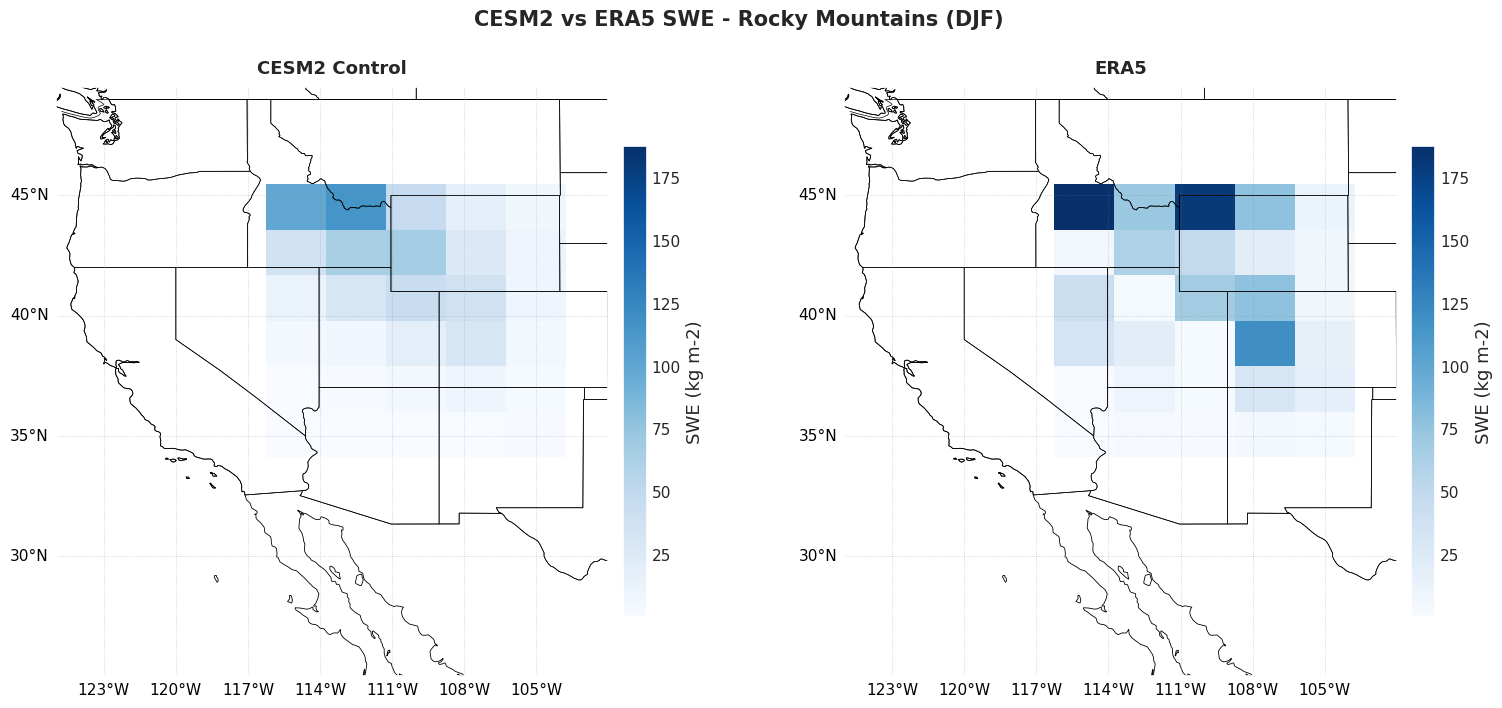

Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/rocky_mountain_swe_difference.png


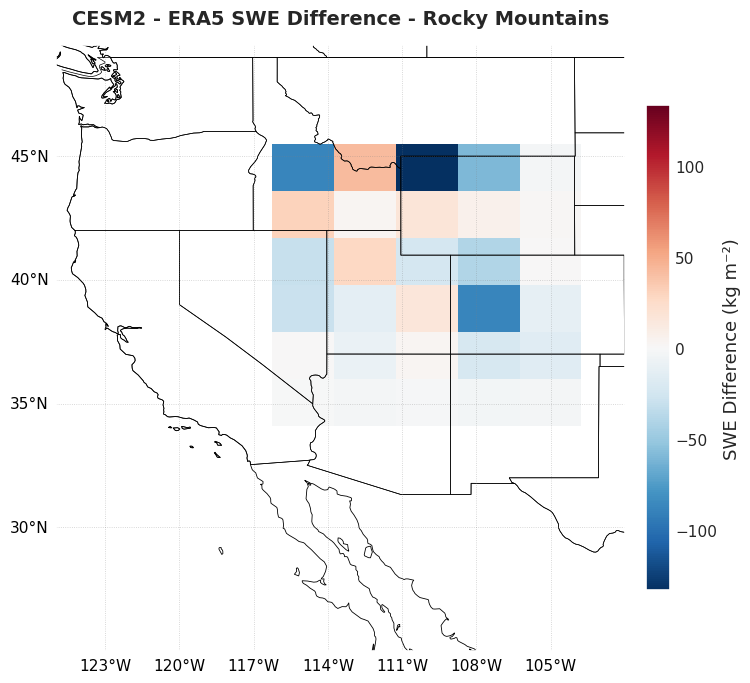

Saved plot to: /glade/u/home/afinnell/ATOC4870/final_project/plots/rocky_mountain_swe_elevation_comparison.png


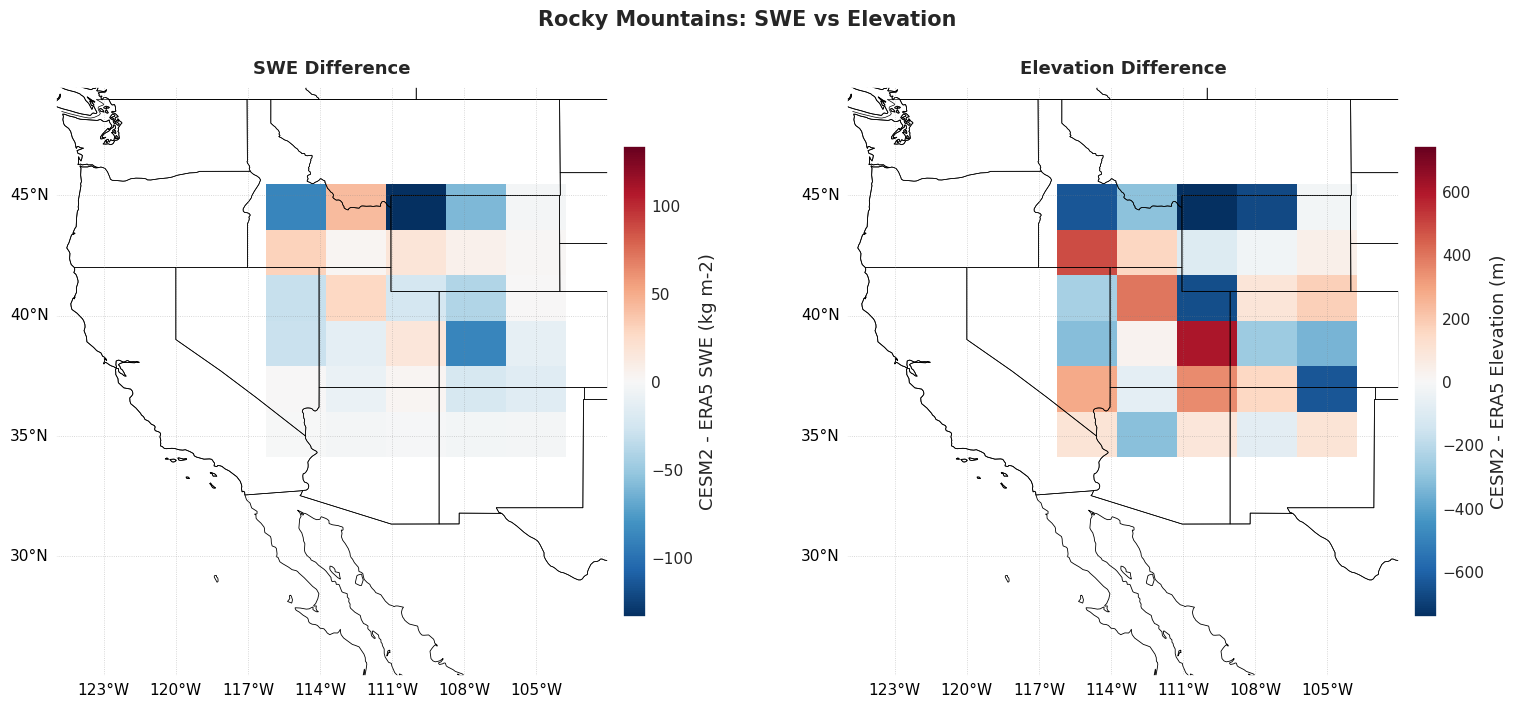

In [111]:
if snw_cesm_west is not None and snw_era5_west is not None and elevation_cesm_west is not None:
    print("\n" + "=" * 60)
    print("ROCKY MOUNTAIN REGIONAL ANALYSIS")
    print("=" * 60)
    
    # Subset to Rocky Mountain domain
    cesm_swe_djf = snw_cesm_west.where(snw_cesm_west.time.dt.month.isin([12, 1, 2])).groupby("time.season").mean("time").sel(season="DJF")
    era5_swe_djf = snw_era5_west.where(snw_era5_west.time.dt.month.isin([12, 1, 2])).groupby("time.season").mean("time").sel(season="DJF")
    
    # Subset to Rocky Mountain region
    cesm_swe_rm = subset_western_us(cesm_swe_djf, bounds=ROCKY_MOUNTAIN_BOUNDS)
    era5_swe_rm = subset_western_us(era5_swe_djf, bounds=ROCKY_MOUNTAIN_BOUNDS)
    elev_cesm_rm = subset_western_us(elevation_cesm_west, bounds=ROCKY_MOUNTAIN_BOUNDS)
    
    if elevation_era5_west is not None:
        elev_era5_rm = subset_western_us(elevation_era5_west, bounds=ROCKY_MOUNTAIN_BOUNDS)
        elev_era5_rm_on_cesm = regrid_to_cesm_grid(elev_era5_rm, elev_cesm_rm, method='bilinear')
        elev_diff_rm = elev_cesm_rm - elev_era5_rm_on_cesm
    
    # Regrid ERA5 to CESM grid
    era5_swe_rm_regridded = regrid_to_cesm_grid(era5_swe_rm, cesm_swe_rm, method='bilinear')
    
    # Compute difference
    swe_diff_rm = cesm_swe_rm - era5_swe_rm_regridded
    
    print(f"\nRocky Mountain Domain Statistics:")
    print(f"  CESM2 SWE mean: {float(cesm_swe_rm.mean(skipna=True).values):.1f} kg m⁻²")
    print(f"  ERA5 SWE mean: {float(era5_swe_rm_regridded.mean(skipna=True).values):.1f} kg m⁻²")
    print(f"  Mean bias: {float(swe_diff_rm.mean(skipna=True).values):.1f} kg m⁻²")
    if elevation_era5_west is not None:
        print(f"  Mean elevation difference: {float(elev_diff_rm.mean(skipna=True).values):.1f} m")
    
    # Plot comparison
    fig, axes = plot_comparison_maps(cesm_swe_rm, era5_swe_rm_regridded, 
                                     title="CESM2 vs ERA5 SWE - Rocky Mountains (DJF)", 
                                     variable_name="SWE")
    save_plot(fig, "rocky_mountain_swe_comparison.png")
    plt.show()
    
    # Plot difference
    fig, ax = plot_spatial_map(swe_diff_rm, 
                               title="CESM2 - ERA5 SWE Difference - Rocky Mountains",
                               cmap="RdBu_r",
                               cbar_label="SWE Difference (kg m⁻²)")
    save_plot(fig, "rocky_mountain_swe_difference.png")
    plt.show()
    
    if elevation_era5_west is not None:
        # Plot elevation and SWE difference side by side
        fig = plot_difference_with_elevation(swe_diff_rm, elev_diff_rm, 
                                              title_prefix="Rocky Mountains", 
                                              variable_name="SWE")
        save_plot(fig, "rocky_mountain_swe_elevation_comparison.png")
        plt.show()

In [112]:
print("\n" + "=" * 60)
print("ANALYSIS COMPLETE")
print("=" * 60)
print("\nProcessed data files saved to:")
print(f"- {DATA_DIR}/")
print("\nPlot files saved to:")
print(f"- {PLOTS_DIR}/")
print("\nRegridding weight files saved to:")
print(f"- {WEIGHTS_DIR}/")

print("\nSummary:")
print("- Spatial comparison maps for SWE and snowfall")
print("- Difference maps showing CESM2 - ERA5 biases")
print("- Elevation comparison between CESM2 and ERA5")
print("- Variable-elevation correlation analysis")


ANALYSIS COMPLETE

Processed data files saved to:
- /glade/u/home/afinnell/ATOC4870/final_project/data/

Plot files saved to:
- /glade/u/home/afinnell/ATOC4870/final_project/plots/

Regridding weight files saved to:
- /glade/u/home/afinnell/ATOC4870/final_project/data/weights/

Summary:
- Spatial comparison maps for SWE and snowfall
- Difference maps showing CESM2 - ERA5 biases
- Elevation comparison between CESM2 and ERA5
- Variable-elevation correlation analysis
